# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.9.2 tensorflow-gpu==2.9.2 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import random

In [5]:
!pip install numba

     ---------------------------------------- 2.6/2.6 MB 993.0 kB/s eta 0:00:00
     -------------------------------------- 27.7/27.7 MB 973.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install cudatoolkit

ERROR: Could not find a version that satisfies the requirement cudatoolkit (from versions: none)
ERROR: No matching distribution found for cudatoolkit

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from numba import jit, cuda

# Dataset 

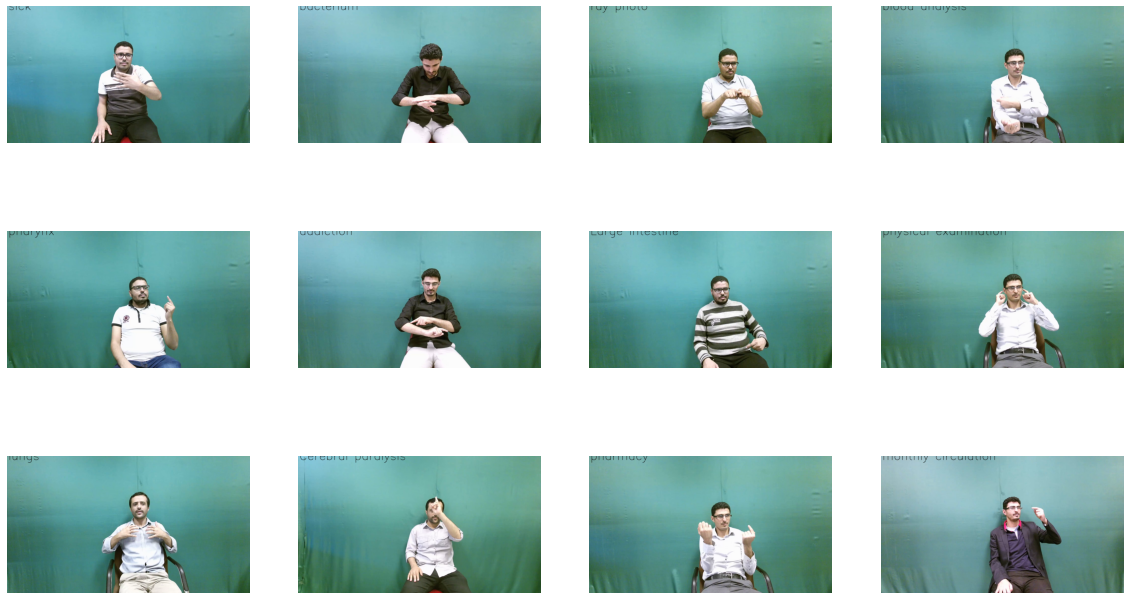

In [11]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in KRdataset.
all_classes_names = os.listdir('dataset/01/train')

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)),12) #4 de kanet 20 

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'dataset/01/train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'dataset/01/train/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
draw_landmarks(frame, results)

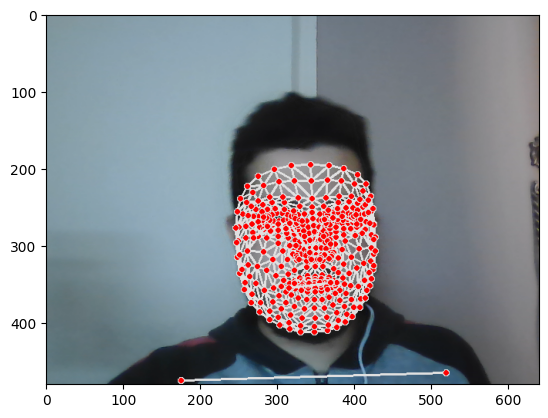

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [8]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [23]:
extract_keypoints(results).shape

(1662,)

In [18]:
result_test

array([ 0.49251199,  0.50435507, -0.97680157, ...,  0.        ,
        0.        ,  0.        ])

In [23]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.49251199,  0.50435507, -0.97680157, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [35]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['acupuncture', 'addiction', 'adhesive tape', 'Aids', 'allergy', 'analysis', 'analysis laboratory', 'anesthetist', 'Appendix', 'Backbone', 'bacterium', 'blood analysis', 'blood pressure', 'burning', 'cancer', 'capsule', 'Cerebral paralysis', 'Chest', 'close', 'cold', 'colic', 'constipation', 'descend', 'diabetes', 'diarrhea', 'digestive system', 'drink', 'dropper', 'drug', 'eat', 'epidemic', 'Face', 'fever', 'first aid', 'five senses', 'gauze', 'headache', 'healthy', 'hear', 'hearing hindrance', 'heart', 'heart attack', 'Heart failure', 'hemiplegia', 'hindrance', 'hospital', 'immunity', 'infection', 'inflammation', 'inhale', 'inoculation', 'Ins and Outs', 'itch', 'Large intestine', 'laser ray', 'liquid medicine', 'liver', 'Loss of hair', 'lungs', 'medicine', 'mentality hindrance', 'microbe', 'mongoloid', 'monthly circulation', 'muscle', 'nerve', 'nervous system', 'ointment', 'oneness', 'open', 'pain', 'pancreas', 'pharmacy', 'pharynx', 'physical disability', 'physical examination', 'pollination', 'pulse', 'ray photo', 'Respiratory device', 'rise', 'sick', 'sight examination', 'silence', 'Skeleton', 'skull', 'sleep', 'Small intestine', 'sphygmometroscope', 'spread', 'stethoscope', 'surgery', 'swelling', 'thermometer', 'tissue', 'Trachea', 'virus', 'visual impairment', 'wake up', 'wound'])
no_sequences = 120 
# Videos are going to be 20 frames in length
sequence_length = 20



In [45]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [46]:
@jit(target_backend='cuda')
def process_video_files(folder_path):
    video_files = []
    counter = -1

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.mp4'):
                video_files.append(os.path.join(root, file))

    mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    for video_file in video_files:
        counter += 1
        if counter > 119:
            counter = 0

        cap = cv2.VideoCapture(video_file)
        root_name = os.path.basename(os.path.normpath(os.path.dirname(video_file)))
        print(video_file)
        print(counter)

        for frame_num in range(sequence_length):
            ret, frame = cap.read()

            if ret == 0:
                break

            image, results = mediapipe_detection(frame, mp_holistic)
            draw_styled_landmarks(image, results)
            cv2.imshow('OpenCV Feed', image)

            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, root_name, str(counter), str(frame_num))
            np.save(npy_path, keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()

    cv2.destroyAllWindows()

In [47]:
folder_path = 'dataset/01/train'
process_video_files(folder_path)

dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_43_58)_c.mp4
0
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_06)_c.mp4
1
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_10)_c.mp4
2
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_14)_c.mp4
3
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_17)_c.mp4
4
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_21)_c.mp4
5
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_28)_c.mp4
6
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_31)_c.mp4
7
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_35)_c.mp4
8
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_38)_c.mp4
9
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_45)_c.mp4
10
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_48)_c.mp4
11
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_44_58)_c.mp4
12
dataset/01/train\acupuncture\03_01_0139_(05_04_17_16_45_02)_c.mp4
13
dataset/01/train\acupuncture\03_01_0139_(05_

dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_53_58)_c.mp4
119
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_02)_c.mp4
0
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_06)_c.mp4
1
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_09)_c.mp4
2
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_13)_c.mp4
3
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_18)_c.mp4
4
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_22)_c.mp4
5
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_25)_c.mp4
6
dataset/01/train\acupuncture\03_03_0139_(21_02_17_16_54_32)_c.mp4
7
dataset/01/train\addiction\03_01_0144_(05_04_17_17_07_31)_c.mp4
8
dataset/01/train\addiction\03_01_0144_(05_04_17_17_07_36)_c.mp4
9
dataset/01/train\addiction\03_01_0144_(05_04_17_17_07_51)_c.mp4
10
dataset/01/train\addiction\03_01_0144_(05_04_17_17_08_01)_c.mp4
11
dataset/01/train\addiction\03_01_0144_(05_04_17_17_08_13)_c.mp4
12
dataset/01/train\addiction\03_01_0144_(05_04_17_17_08

dataset/01/train\addiction\03_03_0144_(21_02_17_17_10_21)_c.mp4
1
dataset/01/train\addiction\03_03_0144_(21_02_17_17_10_34)_c.mp4
2
dataset/01/train\addiction\03_03_0144_(21_02_17_17_10_41)_c.mp4
3
dataset/01/train\addiction\03_03_0144_(21_02_17_17_10_47)_c.mp4
4
dataset/01/train\addiction\03_03_0144_(21_02_17_17_10_53)_c.mp4
5
dataset/01/train\addiction\03_03_0144_(21_02_17_17_10_59)_c.mp4
6
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_13)_c.mp4
7
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_19)_c.mp4
8
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_25)_c.mp4
9
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_32)_c.mp4
10
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_39)_c.mp4
11
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_45)_c.mp4
12
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_52)_c.mp4
13
dataset/01/train\addiction\03_03_0144_(21_02_17_17_11_59)_c.mp4
14
dataset/01/train\addiction\03_03_0144_(21_02_17_17_12_13)_c.mp4
15
data

dataset/01/train\adhesive tape\03_03_0099_(15_12_16_18_02_01)_c.mp4
118
dataset/01/train\adhesive tape\03_03_0099_(15_12_16_18_02_04)_c.mp4
119
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_30)_c.mp4
0
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_34)_c.mp4
1
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_38)_c.mp4
2
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_42)_c.mp4
3
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_46)_c.mp4
4
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_50)_c.mp4
5
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_54)_c.mp4
6
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_31_58)_c.mp4
7
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_32_02)_c.mp4
8
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_32_06)_c.mp4
9
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_32_10)_c.mp4
10
dataset/01/train\adhesive tape\03_03_0099_(22_12_16_10_32_14)_c.mp4
11
dataset/01/tra

dataset/01/train\Aids\03_03_0124_(16_03_17_15_58_53)_c.mp4
7
dataset/01/train\Aids\03_03_0124_(16_03_17_15_58_57)_c.mp4
8
dataset/01/train\Aids\03_03_0124_(20_02_17_17_16_43)_c.mp4
9
dataset/01/train\Aids\03_03_0124_(20_02_17_17_16_53)_c.mp4
10
dataset/01/train\Aids\03_03_0124_(20_02_17_17_16_58)_c.mp4
11
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_04)_c.mp4
12
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_09)_c.mp4
13
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_14)_c.mp4
14
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_19)_c.mp4
15
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_24)_c.mp4
16
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_28)_c.mp4
17
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_33)_c.mp4
18
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_38)_c.mp4
19
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_47)_c.mp4
20
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_51)_c.mp4
21
dataset/01/train\Aids\03_03_0124_(20_02_17_17_17_56)_c.mp4
22
dataset/01/

dataset/01/train\allergy\03_03_0130_(16_03_17_16_15_22)_c.mp4
15
dataset/01/train\allergy\03_03_0130_(16_03_17_16_15_28)_c.mp4
16
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_17)_c.mp4
17
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_21)_c.mp4
18
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_28)_c.mp4
19
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_32)_c.mp4
20
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_36)_c.mp4
21
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_40)_c.mp4
22
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_44)_c.mp4
23
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_47)_c.mp4
24
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_51)_c.mp4
25
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_55)_c.mp4
26
dataset/01/train\allergy\03_03_0130_(20_02_17_18_03_58)_c.mp4
27
dataset/01/train\allergy\03_03_0130_(20_02_17_18_04_01)_c.mp4
28
dataset/01/train\allergy\03_03_0130_(20_02_17_18_04_05)_c.mp4
29
dataset/01/train\allergy\

dataset/01/train\analysis\03_03_0108_(18_12_16_18_02_24)_c.mp4
20
dataset/01/train\analysis\03_03_0108_(18_12_16_18_02_31)_c.mp4
21
dataset/01/train\analysis\03_03_0108_(18_12_16_18_02_37)_c.mp4
22
dataset/01/train\analysis\03_03_0108_(18_12_16_18_02_43)_c.mp4
23
dataset/01/train\analysis\03_03_0108_(18_12_16_18_02_50)_c.mp4
24
dataset/01/train\analysis\03_03_0108_(18_12_16_18_02_56)_c.mp4
25
dataset/01/train\analysis\03_03_0108_(22_12_16_16_15_41)_c.mp4
26
dataset/01/train\analysis\03_03_0108_(22_12_16_16_15_47)_c.mp4
27
dataset/01/train\analysis\03_03_0108_(22_12_16_16_15_53)_c.mp4
28
dataset/01/train\analysis\03_03_0108_(22_12_16_16_15_59)_c.mp4
29
dataset/01/train\analysis\03_03_0108_(22_12_16_16_16_05)_c.mp4
30
dataset/01/train\analysis\03_03_0108_(22_12_16_16_16_18)_c.mp4
31
dataset/01/train\analysis\03_03_0108_(22_12_16_16_16_38)_c.mp4
32
dataset/01/train\analysis\03_03_0108_(22_12_16_16_16_44)_c.mp4
33
dataset/01/train\analysis\03_03_0108_(22_12_16_16_16_51)_c.mp4
34
dataset/01

dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_07)_c.mp4
10
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_13)_c.mp4
11
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_19)_c.mp4
12
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_30)_c.mp4
13
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_35)_c.mp4
14
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_40)_c.mp4
15
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_51)_c.mp4
16
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_05_57)_c.mp4
17
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_06_06)_c.mp4
18
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_06_12)_c.mp4
19
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_06_16)_c.mp4
20
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_06_22)_c.mp4
21
dataset/01/train\analysis laboratory\03_03_0109_(18_12_16_18_06_27)_c.mp4
22

dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_03_45)_c.mp4
4
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_03_50)_c.mp4
5
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_03_55)_c.mp4
6
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_00)_c.mp4
7
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_05)_c.mp4
8
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_09)_c.mp4
9
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_14)_c.mp4
10
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_19)_c.mp4
11
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_24)_c.mp4
12
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_28)_c.mp4
13
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_38)_c.mp4
14
dataset/01/train\anesthetist\03_02_0096_(28_11_16_16_04_43)_c.mp4
15
dataset/01/train\anesthetist\03_03_0096_(15_12_16_17_50_05)_c.mp4
16
dataset/01/train\anesthetist\03_03_0096_(15_12_16_17_50_11)_c.mp4
17
dataset/01/train\anesthetist\03_03_0096_

dataset/01/train\Appendix\03_02_0086_(21_11_16_16_08_48)_c.mp4
6
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_08_51)_c.mp4
7
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_08_58)_c.mp4
8
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_01)_c.mp4
9
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_04)_c.mp4
10
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_06)_c.mp4
11
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_10)_c.mp4
12
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_12)_c.mp4
13
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_18)_c.mp4
14
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_22)_c.mp4
15
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_24)_c.mp4
16
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_28)_c.mp4
17
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_31)_c.mp4
18
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_34)_c.mp4
19
dataset/01/train\Appendix\03_02_0086_(21_11_16_16_09_37)_c.mp4
20
dataset/01/tra

dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_02)_c.mp4
11
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_08)_c.mp4
12
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_13)_c.mp4
13
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_17)_c.mp4
14
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_21)_c.mp4
15
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_25)_c.mp4
16
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_29)_c.mp4
17
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_33)_c.mp4
18
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_40)_c.mp4
19
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_44)_c.mp4
20
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_48)_c.mp4
21
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_52)_c.mp4
22
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_40_56)_c.mp4
23
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_41_00)_c.mp4
24
dataset/01/train\Backbone\03_02_0073_(21_11_16_15_41_04)_c.mp4
25
dataset/01

dataset/01/train\bacterium\03_02_0147_(18_04_17_19_21_40)_c.mp4
15
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_21_48)_c.mp4
16
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_21_52)_c.mp4
17
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_21_56)_c.mp4
18
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_21_59)_c.mp4
19
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_03)_c.mp4
20
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_07)_c.mp4
21
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_11)_c.mp4
22
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_14)_c.mp4
23
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_18)_c.mp4
24
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_22)_c.mp4
25
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_25)_c.mp4
26
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_29)_c.mp4
27
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_32)_c.mp4
28
dataset/01/train\bacterium\03_02_0147_(18_04_17_19_22_40)_c.mp

dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_14)_c.mp4
14
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_18)_c.mp4
15
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_22)_c.mp4
16
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_26)_c.mp4
17
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_33)_c.mp4
18
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_37)_c.mp4
19
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_40)_c.mp4
20
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_44)_c.mp4
21
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_47)_c.mp4
22
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_51)_c.mp4
23
dataset/01/train\blood analysis\03_02_0101_(12_12_16_17_27_55)_c.mp4
24
dataset/01/train\blood analysis\03_02_0101_(28_11_16_16_18_21)_c.mp4
25
dataset/01/train\blood analysis\03_02_0101_(28_11_16_16_18_31)_c.mp4
26
dataset/01/train\blood analysis\03_02_0101_(28_11_16_16_18_49)_c

dataset/01/train\blood pressure\03_01_0129_(21_10_17_13_57_23)_c.mp4
8
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_26_57)_c.mp4
9
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_00)_c.mp4
10
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_03)_c.mp4
11
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_05)_c.mp4
12
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_08)_c.mp4
13
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_11)_c.mp4
14
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_14)_c.mp4
15
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_20)_c.mp4
16
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_22)_c.mp4
17
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_25)_c.mp4
18
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_28)_c.mp4
19
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_31)_c.mp4
20
dataset/01/train\blood pressure\03_02_0129_(15_03_17_16_27_33)_c.m

dataset/01/train\burning\03_01_0095_(24_11_16_17_39_22)_c.mp4
5
dataset/01/train\burning\03_01_0095_(24_11_16_17_39_27)_c.mp4
6
dataset/01/train\burning\03_01_0095_(24_11_16_17_39_31)_c.mp4
7
dataset/01/train\burning\03_01_0095_(24_11_16_17_39_35)_c.mp4
8
dataset/01/train\burning\03_01_0095_(24_11_16_17_39_42)_c.mp4
9
dataset/01/train\burning\03_01_0095_(24_11_16_17_39_53)_c.mp4
10
dataset/01/train\burning\03_01_0095_(24_11_16_17_39_58)_c.mp4
11
dataset/01/train\burning\03_01_0095_(24_11_16_17_40_03)_c.mp4
12
dataset/01/train\burning\03_01_0095_(24_11_16_17_40_13)_c.mp4
13
dataset/01/train\burning\03_01_0095_(24_11_16_17_40_17)_c.mp4
14
dataset/01/train\burning\03_01_0095_(24_11_16_17_40_22)_c.mp4
15
dataset/01/train\burning\03_01_0095_(24_11_16_17_40_27)_c.mp4
16
dataset/01/train\burning\03_02_0095_(12_12_16_17_10_37)_c.mp4
17
dataset/01/train\burning\03_02_0095_(12_12_16_17_10_42)_c.mp4
18
dataset/01/train\burning\03_02_0095_(12_12_16_17_10_51)_c.mp4
19
dataset/01/train\burning\03_02

dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_00)_c.mp4
12
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_08)_c.mp4
13
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_12)_c.mp4
14
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_16)_c.mp4
15
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_20)_c.mp4
16
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_24)_c.mp4
17
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_28)_c.mp4
18
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_32)_c.mp4
19
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_36)_c.mp4
20
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_40)_c.mp4
21
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_44)_c.mp4
22
dataset/01/train\cancer\03_01_0123_(05_04_17_15_52_48)_c.mp4
23
dataset/01/train\cancer\03_02_0123_(15_03_17_16_07_58)_c.mp4
24
dataset/01/train\cancer\03_02_0123_(15_03_17_16_08_01)_c.mp4
25
dataset/01/train\cancer\03_02_0123_(15_03_17_16_08_10)_c.mp4
26
dataset/01/train\cancer\03_02_0123_(15_0

dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_18)_c.mp4
20
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_22)_c.mp4
21
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_24)_c.mp4
22
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_27)_c.mp4
23
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_30)_c.mp4
24
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_33)_c.mp4
25
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_39)_c.mp4
26
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_45)_c.mp4
27
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_54)_c.mp4
28
dataset/01/train\capsule\03_01_0135_(21_10_17_14_08_57)_c.mp4
29
dataset/01/train\capsule\03_01_0135_(21_10_17_14_09_00)_c.mp4
30
dataset/01/train\capsule\03_01_0135_(21_10_17_14_09_05)_c.mp4
31
dataset/01/train\capsule\03_02_0135_(15_03_17_16_46_44)_c.mp4
32
dataset/01/train\capsule\03_02_0135_(15_03_17_16_46_51)_c.mp4
33
dataset/01/train\capsule\03_02_0135_(15_03_17_16_46_55)_c.mp4
34
dataset/01/train\capsule\

dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_54_46)_c.mp4
22
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_54_49)_c.mp4
23
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_54_51)_c.mp4
24
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_54_54)_c.mp4
25
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_54_57)_c.mp4
26
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_54_59)_c.mp4
27
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_02)_c.mp4
28
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_04)_c.mp4
29
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_07)_c.mp4
30
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_09)_c.mp4
31
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_12)_c.mp4
32
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_15)_c.mp4
33
dataset/01/train\Cerebral paralysis\03_01_0128_(21_10_17_13_55_17)_c.mp4
34
dataset/01/t

dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_05)_c.mp4
11
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_10)_c.mp4
12
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_14)_c.mp4
13
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_22)_c.mp4
14
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_30)_c.mp4
15
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_39)_c.mp4
16
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_48)_c.mp4
17
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_52)_c.mp4
18
dataset/01/train\Chest\03_01_0074_(01_12_16_16_03_56)_c.mp4
19
dataset/01/train\Chest\03_01_0074_(01_12_16_16_04_01)_c.mp4
20
dataset/01/train\Chest\03_01_0074_(01_12_16_16_04_05)_c.mp4
21
dataset/01/train\Chest\03_01_0074_(01_12_16_16_04_09)_c.mp4
22
dataset/01/train\Chest\03_01_0074_(01_12_16_16_04_12)_c.mp4
23
dataset/01/train\Chest\03_01_0074_(01_12_16_16_04_25)_c.mp4
24
dataset/01/train\Chest\03_01_0074_(01_12_16_16_04_29)_c.mp4
25
dataset/01/train\Chest\03_01_0074_(20_11_16_16_35_57)_c

dataset/01/train\close\03_01_0170_(17_04_17_18_49_35)_c.mp4
21
dataset/01/train\close\03_01_0170_(17_04_17_18_49_41)_c.mp4
22
dataset/01/train\close\03_01_0170_(17_04_17_18_49_45)_c.mp4
23
dataset/01/train\close\03_01_0170_(17_04_17_18_49_49)_c.mp4
24
dataset/01/train\close\03_01_0170_(17_04_17_18_49_52)_c.mp4
25
dataset/01/train\close\03_01_0170_(17_04_17_18_49_56)_c.mp4
26
dataset/01/train\close\03_01_0170_(17_04_17_18_50_04)_c.mp4
27
dataset/01/train\close\03_01_0170_(17_04_17_18_50_07)_c.mp4
28
dataset/01/train\close\03_01_0170_(17_04_17_18_50_11)_c.mp4
29
dataset/01/train\close\03_01_0170_(17_04_17_18_50_14)_c.mp4
30
dataset/01/train\close\03_01_0170_(17_04_17_18_50_18)_c.mp4
31
dataset/01/train\close\03_01_0170_(17_04_17_18_50_21)_c.mp4
32
dataset/01/train\close\03_01_0170_(17_04_17_18_50_25)_c.mp4
33
dataset/01/train\close\03_01_0170_(17_04_17_18_50_28)_c.mp4
34
dataset/01/train\close\03_01_0170_(17_04_17_18_50_32)_c.mp4
35
dataset/01/train\close\03_01_0170_(17_04_17_18_50_35)_c

dataset/01/train\cold\03_01_0113_(04_12_16_15_51_10)_c.mp4
31
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_14)_c.mp4
32
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_19)_c.mp4
33
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_23)_c.mp4
34
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_28)_c.mp4
35
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_32)_c.mp4
36
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_37)_c.mp4
37
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_41)_c.mp4
38
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_45)_c.mp4
39
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_48)_c.mp4
40
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_53)_c.mp4
41
dataset/01/train\cold\03_01_0113_(04_12_16_15_51_56)_c.mp4
42
dataset/01/train\cold\03_01_0113_(04_12_16_15_52_04)_c.mp4
43
dataset/01/train\cold\03_01_0113_(04_12_16_15_52_08)_c.mp4
44
dataset/01/train\cold\03_01_0113_(04_12_16_15_52_12)_c.mp4
45
dataset/01/train\cold\03_01_0113_(04_12_16_15_52_16)_c.mp4
46
dataset/

dataset/01/train\colic\03_01_0120_(04_12_16_16_13_18)_c.mp4
43
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_22)_c.mp4
44
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_33)_c.mp4
45
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_37)_c.mp4
46
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_41)_c.mp4
47
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_44)_c.mp4
48
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_48)_c.mp4
49
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_51)_c.mp4
50
dataset/01/train\colic\03_01_0120_(04_12_16_16_13_55)_c.mp4
51
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_08)_c.mp4
52
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_11)_c.mp4
53
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_18)_c.mp4
54
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_22)_c.mp4
55
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_25)_c.mp4
56
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_32)_c.mp4
57
dataset/01/train\colic\03_01_0120_(06_12_16_17_17_36)_c

dataset/01/train\constipation\03_01_0119_(04_12_16_16_10_27)_c.mp4
52
dataset/01/train\constipation\03_01_0119_(04_12_16_16_10_31)_c.mp4
53
dataset/01/train\constipation\03_01_0119_(04_12_16_16_10_39)_c.mp4
54
dataset/01/train\constipation\03_01_0119_(04_12_16_16_10_44)_c.mp4
55
dataset/01/train\constipation\03_01_0119_(04_12_16_16_10_48)_c.mp4
56
dataset/01/train\constipation\03_01_0119_(04_12_16_16_11_42)_c.mp4
57
dataset/01/train\constipation\03_01_0119_(04_12_16_16_11_49)_c.mp4
58
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_24)_c.mp4
59
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_28)_c.mp4
60
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_31)_c.mp4
61
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_35)_c.mp4
62
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_38)_c.mp4
63
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_41)_c.mp4
64
dataset/01/train\constipation\03_01_0119_(06_12_16_17_15_44)_c.mp4
65
dataset/01/train\con

dataset/01/train\descend\03_01_0168_(17_04_17_18_44_27)_c.mp4
50
dataset/01/train\descend\03_01_0168_(17_04_17_18_44_31)_c.mp4
51
dataset/01/train\descend\03_01_0168_(17_04_17_18_44_43)_c.mp4
52
dataset/01/train\descend\03_01_0168_(17_04_17_18_44_47)_c.mp4
53
dataset/01/train\descend\03_01_0168_(17_04_17_18_44_52)_c.mp4
54
dataset/01/train\descend\03_01_0168_(17_04_17_18_44_56)_c.mp4
55
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_05)_c.mp4
56
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_10)_c.mp4
57
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_18)_c.mp4
58
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_22)_c.mp4
59
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_26)_c.mp4
60
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_30)_c.mp4
61
dataset/01/train\descend\03_01_0168_(17_04_17_18_45_35)_c.mp4
62
dataset/01/train\descend\03_01_0168_(21_10_17_15_26_10)_c.mp4
63
dataset/01/train\descend\03_01_0168_(21_10_17_15_26_12)_c.mp4
64
dataset/01/train\descend\

dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_07)_c.mp4
56
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_13)_c.mp4
57
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_19)_c.mp4
58
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_25)_c.mp4
59
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_38)_c.mp4
60
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_50)_c.mp4
61
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_36_56)_c.mp4
62
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_37_02)_c.mp4
63
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_37_08)_c.mp4
64
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_37_14)_c.mp4
65
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_37_25)_c.mp4
66
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_37_31)_c.mp4
67
dataset/01/train\diabetes\03_01_0121_(03_01_17_17_37_37)_c.mp4
68
dataset/01/train\diabetes\03_01_0121_(05_04_17_15_43_46)_c.mp4
69
dataset/01/train\diabetes\03_01_0121_(05_04_17_15_43_51)_c.mp4
70
dataset/01

dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_06_18)_c.mp4
60
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_06_27)_c.mp4
61
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_06_32)_c.mp4
62
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_06_37)_c.mp4
63
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_06_52)_c.mp4
64
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_06_56)_c.mp4
65
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_01)_c.mp4
66
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_05)_c.mp4
67
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_10)_c.mp4
68
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_14)_c.mp4
69
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_18)_c.mp4
70
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_23)_c.mp4
71
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_28)_c.mp4
72
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_32)_c.mp4
73
dataset/01/train\diarrhea\03_01_0118_(04_12_16_16_07_37)_c.mp4
74
dataset/01

dataset/01/train\diarrhea\03_03_0118_(22_12_16_16_45_22)_c.mp4
64
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_10)_c.mp4
65
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_15)_c.mp4
66
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_19)_c.mp4
67
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_29)_c.mp4
68
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_34)_c.mp4
69
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_39)_c.mp4
70
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_43)_c.mp4
71
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_48)_c.mp4
72
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_53)_c.mp4
73
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_16_58)_c.mp4
74
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_17_02)_c.mp4
75
dataset/01/train\digestive system\03_01_0079_(01_12_16_16_17_11)_c.mp4
76
dataset/01/train\digestive system\03_01_0079_(

dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_03)_c.mp4
55
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_09)_c.mp4
56
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_19)_c.mp4
57
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_24)_c.mp4
58
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_29)_c.mp4
59
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_34)_c.mp4
60
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_40)_c.mp4
61
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_45)_c.mp4
62
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_50)_c.mp4
63
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_32_55)_c.mp4
64
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_33_00)_c.mp4
65
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_33_05)_c.mp4
66
dataset/01/train\digestive system\03_03_0079_(15_12_16_16_33_09)_c.mp4
67
dataset/01/train\digestive system\03_0

dataset/01/train\drink\03_03_0161_(21_03_17_21_37_11)_c.mp4
63
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_16)_c.mp4
64
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_19)_c.mp4
65
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_27)_c.mp4
66
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_30)_c.mp4
67
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_32)_c.mp4
68
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_35)_c.mp4
69
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_37)_c.mp4
70
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_40)_c.mp4
71
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_43)_c.mp4
72
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_45)_c.mp4
73
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_50)_c.mp4
74
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_53)_c.mp4
75
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_56)_c.mp4
76
dataset/01/train\drink\03_03_0161_(21_03_17_21_37_58)_c.mp4
77
dataset/01/train\drink\03_03_0161_(21_03_17_21_38_01)_c

dataset/01/train\dropper\03_03_0138_(21_02_17_16_50_53)_c.mp4
70
dataset/01/train\dropper\03_03_0138_(21_02_17_16_50_56)_c.mp4
71
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_00)_c.mp4
72
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_04)_c.mp4
73
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_08)_c.mp4
74
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_12)_c.mp4
75
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_15)_c.mp4
76
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_19)_c.mp4
77
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_22)_c.mp4
78
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_26)_c.mp4
79
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_29)_c.mp4
80
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_36)_c.mp4
81
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_39)_c.mp4
82
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_42)_c.mp4
83
dataset/01/train\dropper\03_03_0138_(21_02_17_16_51_45)_c.mp4
84
dataset/01/train\dropper\

dataset/01/train\drug\03_03_0143_(21_02_17_17_06_49)_c.mp4
82
dataset/01/train\drug\03_03_0143_(21_02_17_17_06_54)_c.mp4
83
dataset/01/train\drug\03_03_0143_(21_02_17_17_06_58)_c.mp4
84
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_01)_c.mp4
85
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_05)_c.mp4
86
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_09)_c.mp4
87
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_13)_c.mp4
88
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_17)_c.mp4
89
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_21)_c.mp4
90
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_24)_c.mp4
91
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_28)_c.mp4
92
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_32)_c.mp4
93
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_37)_c.mp4
94
dataset/01/train\drug\03_03_0143_(21_02_17_17_07_41)_c.mp4
95
dataset/01/train\eat\03_01_0160_(06_04_17_17_54_10)_c.mp4
96
dataset/01/train\eat\03_01_0160_(06_04_17_17_54_33)_c.mp4
97
dataset/01

dataset/01/train\eat\03_03_0160_(21_03_17_21_35_58)_c.mp4
96
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_01)_c.mp4
97
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_03)_c.mp4
98
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_06)_c.mp4
99
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_09)_c.mp4
100
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_12)_c.mp4
101
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_15)_c.mp4
102
dataset/01/train\eat\03_03_0160_(21_03_17_21_36_18)_c.mp4
103
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_07_56)_c.mp4
104
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_08_00)_c.mp4
105
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_08_04)_c.mp4
106
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_08_09)_c.mp4
107
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_08_14)_c.mp4
108
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_08_18)_c.mp4
109
dataset/01/train\epidemic\03_01_0156_(06_04_17_17_08_23)_c.mp4
110
dataset/01/train\epidemic\03_01_0156_(0

dataset/01/train\epidemic\03_03_0156_(21_03_17_21_25_38)_c.mp4
101
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_25_42)_c.mp4
102
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_25_45)_c.mp4
103
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_25_49)_c.mp4
104
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_25_53)_c.mp4
105
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_25_57)_c.mp4
106
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_01)_c.mp4
107
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_05)_c.mp4
108
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_09)_c.mp4
109
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_12)_c.mp4
110
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_16)_c.mp4
111
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_20)_c.mp4
112
dataset/01/train\epidemic\03_03_0156_(21_03_17_21_26_24)_c.mp4
113
dataset/01/train\Face\03_01_0080_(01_12_16_16_18_39)_c.mp4
114
dataset/01/train\Face\03_01_0080_(01_12_16_16_18_46)_c.mp4
115
dat

dataset/01/train\Face\03_03_0080_(15_12_16_16_35_18)_c.mp4
112
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_23)_c.mp4
113
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_27)_c.mp4
114
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_31)_c.mp4
115
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_35)_c.mp4
116
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_39)_c.mp4
117
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_42)_c.mp4
118
dataset/01/train\Face\03_03_0080_(15_12_16_16_35_50)_c.mp4
119
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_33)_c.mp4
0
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_37)_c.mp4
1
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_41)_c.mp4
2
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_45)_c.mp4
3
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_50)_c.mp4
4
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_54)_c.mp4
5
dataset/01/train\fever\03_01_0117_(04_12_16_16_03_59)_c.mp4
6
dataset/01/train\fever\03_01_0117_(04_12_16_16_04_03)_c.mp4
7


dataset/01/train\fever\03_03_0117_(22_12_16_16_42_35)_c.mp4
2
dataset/01/train\fever\03_03_0117_(22_12_16_16_42_38)_c.mp4
3
dataset/01/train\fever\03_03_0117_(22_12_16_16_42_41)_c.mp4
4
dataset/01/train\fever\03_03_0117_(22_12_16_16_42_44)_c.mp4
5
dataset/01/train\first aid\03_01_0093_(01_12_16_17_24_36)_c.mp4
6
dataset/01/train\first aid\03_01_0093_(01_12_16_17_24_41)_c.mp4
7
dataset/01/train\first aid\03_01_0093_(01_12_16_17_24_46)_c.mp4
8
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_01)_c.mp4
9
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_07)_c.mp4
10
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_12)_c.mp4
11
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_22)_c.mp4
12
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_27)_c.mp4
13
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_32)_c.mp4
14
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_43)_c.mp4
15
dataset/01/train\first aid\03_01_0093_(01_12_16_17_25_49)_c.mp4
16
dataset/01/train\fi

dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_13)_c.mp4
5
dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_18)_c.mp4
6
dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_23)_c.mp4
7
dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_29)_c.mp4
8
dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_34)_c.mp4
9
dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_40)_c.mp4
10
dataset/01/train\first aid\03_03_0093_(20_12_16_17_47_49)_c.mp4
11
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_08)_c.mp4
12
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_13)_c.mp4
13
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_17)_c.mp4
14
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_26)_c.mp4
15
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_31)_c.mp4
16
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_35)_c.mp4
17
dataset/01/train\five senses\03_01_0089_(01_12_16_16_50_39)_c.mp4
18
dataset/01/train\five senses\03_01_0089_(01_12_16_16_

dataset/01/train\five senses\03_03_0089_(20_12_16_17_31_41)_c.mp4
4
dataset/01/train\five senses\03_03_0089_(20_12_16_17_31_50)_c.mp4
5
dataset/01/train\five senses\03_03_0089_(20_12_16_17_31_55)_c.mp4
6
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_04)_c.mp4
7
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_09)_c.mp4
8
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_14)_c.mp4
9
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_20)_c.mp4
10
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_24)_c.mp4
11
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_29)_c.mp4
12
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_35)_c.mp4
13
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_41)_c.mp4
14
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_46)_c.mp4
15
dataset/01/train\five senses\03_03_0089_(20_12_16_17_32_52)_c.mp4
16
dataset/01/train\five senses\03_03_0089_(20_12_16_17_33_03)_c.mp4
17
dataset/01/train\five senses\03_03_0089_

dataset/01/train\gauze\03_03_0098_(22_12_16_10_29_57)_c.mp4
13
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_01)_c.mp4
14
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_07)_c.mp4
15
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_12)_c.mp4
16
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_17)_c.mp4
17
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_21)_c.mp4
18
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_25)_c.mp4
19
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_34)_c.mp4
20
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_38)_c.mp4
21
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_42)_c.mp4
22
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_51)_c.mp4
23
dataset/01/train\gauze\03_03_0098_(22_12_16_10_30_55)_c.mp4
24
dataset/01/train\headache\03_01_0115_(04_12_16_15_57_51)_c.mp4
25
dataset/01/train\headache\03_01_0115_(04_12_16_15_57_57)_c.mp4
26
dataset/01/train\headache\03_01_0115_(04_12_16_15_58_02)_c.mp4
27
dataset/01/train\headache\03_01_0115_(04_12_16

dataset/01/train\headache\03_03_0115_(22_12_16_16_36_38)_c.mp4
18
dataset/01/train\headache\03_03_0115_(22_12_16_16_36_48)_c.mp4
19
dataset/01/train\headache\03_03_0115_(22_12_16_16_36_53)_c.mp4
20
dataset/01/train\headache\03_03_0115_(22_12_16_16_36_58)_c.mp4
21
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_03)_c.mp4
22
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_12)_c.mp4
23
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_17)_c.mp4
24
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_22)_c.mp4
25
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_40)_c.mp4
26
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_48)_c.mp4
27
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_52)_c.mp4
28
dataset/01/train\headache\03_03_0115_(22_12_16_16_37_57)_c.mp4
29
dataset/01/train\headache\03_03_0115_(22_12_16_16_38_01)_c.mp4
30
dataset/01/train\headache\03_03_0115_(22_12_16_16_38_06)_c.mp4
31
dataset/01/train\healthy\03_01_0159_(06_04_17_17_51_47)_c.mp4
32
dataset/01/

dataset/01/train\healthy\03_03_0159_(21_03_17_21_31_30)_c.mp4
24
dataset/01/train\healthy\03_03_0159_(21_03_17_21_31_33)_c.mp4
25
dataset/01/train\healthy\03_03_0159_(21_03_17_21_31_37)_c.mp4
26
dataset/01/train\healthy\03_03_0159_(21_03_17_21_31_40)_c.mp4
27
dataset/01/train\healthy\03_03_0159_(21_03_17_21_31_51)_c.mp4
28
dataset/01/train\healthy\03_03_0159_(21_03_17_21_31_58)_c.mp4
29
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_01)_c.mp4
30
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_05)_c.mp4
31
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_11)_c.mp4
32
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_18)_c.mp4
33
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_24)_c.mp4
34
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_28)_c.mp4
35
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_31)_c.mp4
36
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_34)_c.mp4
37
dataset/01/train\healthy\03_03_0159_(21_03_17_21_32_37)_c.mp4
38
dataset/01/train\healthy\

dataset/01/train\hear\03_03_0164_(21_03_17_21_47_18)_c.mp4
36
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_21)_c.mp4
37
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_27)_c.mp4
38
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_29)_c.mp4
39
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_32)_c.mp4
40
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_38)_c.mp4
41
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_40)_c.mp4
42
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_43)_c.mp4
43
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_46)_c.mp4
44
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_48)_c.mp4
45
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_51)_c.mp4
46
dataset/01/train\hear\03_03_0164_(21_03_17_21_47_54)_c.mp4
47
dataset/01/train\hearing hindrance\03_01_0155_(06_04_17_17_04_51)_c.mp4
48
dataset/01/train\hearing hindrance\03_01_0155_(06_04_17_17_05_36)_c.mp4
49
dataset/01/train\hearing hindrance\03_01_0155_(06_04_17_17_05_58)_c.mp4
50
dataset/01/train\hearing hindra

dataset/01/train\hearing hindrance\03_03_0155_(21_02_17_18_14_38)_c.mp4
28
dataset/01/train\hearing hindrance\03_03_0155_(21_02_17_18_14_41)_c.mp4
29
dataset/01/train\hearing hindrance\03_03_0155_(21_02_17_18_14_45)_c.mp4
30
dataset/01/train\hearing hindrance\03_03_0155_(21_02_17_18_14_48)_c.mp4
31
dataset/01/train\hearing hindrance\03_03_0155_(21_02_17_18_14_52)_c.mp4
32
dataset/01/train\hearing hindrance\03_03_0155_(21_02_17_18_14_59)_c.mp4
33
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_22_59)_c.mp4
34
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_23_05)_c.mp4
35
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_23_08)_c.mp4
36
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_23_11)_c.mp4
37
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_23_13)_c.mp4
38
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_23_17)_c.mp4
39
dataset/01/train\hearing hindrance\03_03_0155_(21_03_17_21_23_20)_c.mp4
40
dataset/01/train\hearing 

dataset/01/train\heart\03_03_0088_(15_12_16_17_22_35)_c.mp4
33
dataset/01/train\heart\03_03_0088_(15_12_16_17_22_40)_c.mp4
34
dataset/01/train\heart\03_03_0088_(15_12_16_17_22_44)_c.mp4
35
dataset/01/train\heart\03_03_0088_(15_12_16_17_22_48)_c.mp4
36
dataset/01/train\heart\03_03_0088_(15_12_16_17_22_52)_c.mp4
37
dataset/01/train\heart\03_03_0088_(15_12_16_17_22_57)_c.mp4
38
dataset/01/train\heart\03_03_0088_(15_12_16_17_23_01)_c.mp4
39
dataset/01/train\heart\03_03_0088_(15_12_16_17_23_05)_c.mp4
40
dataset/01/train\heart\03_03_0088_(15_12_16_17_23_09)_c.mp4
41
dataset/01/train\heart\03_03_0088_(15_12_16_17_23_13)_c.mp4
42
dataset/01/train\heart\03_03_0088_(15_12_16_17_23_22)_c.mp4
43
dataset/01/train\heart\03_03_0088_(20_12_16_17_28_23)_c.mp4
44
dataset/01/train\heart\03_03_0088_(20_12_16_17_28_27)_c.mp4
45
dataset/01/train\heart\03_03_0088_(20_12_16_17_28_32)_c.mp4
46
dataset/01/train\heart\03_03_0088_(20_12_16_17_28_36)_c.mp4
47
dataset/01/train\heart\03_03_0088_(20_12_16_17_28_41)_c

dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_13)_c.mp4
33
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_16)_c.mp4
34
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_20)_c.mp4
35
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_24)_c.mp4
36
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_28)_c.mp4
37
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_32)_c.mp4
38
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_36)_c.mp4
39
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_40)_c.mp4
40
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_43)_c.mp4
41
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_47)_c.mp4
42
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_50)_c.mp4
43
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_54)_c.mp4
44
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_53_58)_c.mp4
45
dataset/01/train\heart attack\03_03_0122_(16_03_17_15_54_02)_c.mp4
46
dataset/01/train\hea

dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_03)_c.mp4
29
dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_07)_c.mp4
30
dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_11)_c.mp4
31
dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_15)_c.mp4
32
dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_22)_c.mp4
33
dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_26)_c.mp4
34
dataset/01/train\Heart failure\03_02_0126_(19_03_17_18_52_30)_c.mp4
35
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_02_39)_c.mp4
36
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_02_42)_c.mp4
37
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_02_46)_c.mp4
38
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_02_54)_c.mp4
39
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_02_57)_c.mp4
40
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_03_02)_c.mp4
41
dataset/01/train\Heart failure\03_03_0126_(16_03_17_16_03_06)_c.mp4
42
datase

dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_12)_c.mp4
28
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_16)_c.mp4
29
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_20)_c.mp4
30
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_24)_c.mp4
31
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_28)_c.mp4
32
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_36)_c.mp4
33
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_40)_c.mp4
34
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_44)_c.mp4
35
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_48)_c.mp4
36
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_52)_c.mp4
37
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_53_56)_c.mp4
38
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_54_00)_c.mp4
39
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_54_04)_c.mp4
40
dataset/01/train\hemiplegia\03_02_0127_(19_03_17_18_54_07)_c.mp4
41
dataset/01/train\hemiplegia\03_02_0127_(19_03_17

dataset/01/train\hindrance\03_02_0151_(11_04_17_16_39_22)_c.mp4
30
dataset/01/train\hindrance\03_02_0151_(11_04_17_16_39_24)_c.mp4
31
dataset/01/train\hindrance\03_02_0151_(11_04_17_16_39_27)_c.mp4
32
dataset/01/train\hindrance\03_02_0151_(11_04_17_16_39_31)_c.mp4
33
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_16)_c.mp4
34
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_24)_c.mp4
35
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_27)_c.mp4
36
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_33)_c.mp4
37
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_36)_c.mp4
38
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_39)_c.mp4
39
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_42)_c.mp4
40
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_45)_c.mp4
41
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_49)_c.mp4
42
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_31_52)_c.mp4
43
dataset/01/train\hindrance\03_02_0151_(18_04_17_19_32_00)_c.mp

dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_05)_c.mp4
33
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_09)_c.mp4
34
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_13)_c.mp4
35
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_16)_c.mp4
36
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_24)_c.mp4
37
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_31)_c.mp4
38
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_34)_c.mp4
39
dataset/01/train\hospital\03_02_0092_(12_12_16_16_48_40)_c.mp4
40
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_12)_c.mp4
41
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_17)_c.mp4
42
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_26)_c.mp4
43
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_30)_c.mp4
44
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_34)_c.mp4
45
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_39)_c.mp4
46
dataset/01/train\hospital\03_02_0092_(28_11_16_15_51_43)_c.mp4
47
dataset/01

dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_32)_c.mp4
37
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_35)_c.mp4
38
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_38)_c.mp4
39
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_41)_c.mp4
40
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_45)_c.mp4
41
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_48)_c.mp4
42
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_51)_c.mp4
43
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_53)_c.mp4
44
dataset/01/train\immunity\03_02_0157_(11_04_17_16_52_58)_c.mp4
45
dataset/01/train\immunity\03_02_0157_(18_04_17_19_45_52)_c.mp4
46
dataset/01/train\immunity\03_02_0157_(18_04_17_19_45_55)_c.mp4
47
dataset/01/train\immunity\03_02_0157_(18_04_17_19_45_58)_c.mp4
48
dataset/01/train\immunity\03_02_0157_(18_04_17_19_46_01)_c.mp4
49
dataset/01/train\immunity\03_02_0157_(18_04_17_19_46_04)_c.mp4
50
dataset/01/train\immunity\03_02_0157_(18_04_17_19_46_07)_c.mp4
51
dataset/01

dataset/01/train\infection\03_02_0114_(14_12_16_16_13_22)_c.mp4
41
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_26)_c.mp4
42
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_30)_c.mp4
43
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_33)_c.mp4
44
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_36)_c.mp4
45
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_43)_c.mp4
46
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_47)_c.mp4
47
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_51)_c.mp4
48
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_55)_c.mp4
49
dataset/01/train\infection\03_02_0114_(14_12_16_16_13_59)_c.mp4
50
dataset/01/train\infection\03_02_0114_(14_12_16_16_14_03)_c.mp4
51
dataset/01/train\infection\03_02_0114_(14_12_16_16_14_07)_c.mp4
52
dataset/01/train\infection\03_02_0114_(14_12_16_16_14_11)_c.mp4
53
dataset/01/train\infection\03_02_0114_(14_12_16_16_14_14)_c.mp4
54
dataset/01/train\infection\03_02_0114_(14_12_16_16_14_18)_c.mp

dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_01)_c.mp4
42
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_05)_c.mp4
43
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_08)_c.mp4
44
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_12)_c.mp4
45
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_24)_c.mp4
46
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_28)_c.mp4
47
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_32)_c.mp4
48
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_36)_c.mp4
49
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_39)_c.mp4
50
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_43)_c.mp4
51
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_51)_c.mp4
52
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_55)_c.mp4
53
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_05_59)_c.mp4
54
dataset/01/train\inflammation\03_02_0111_(14_12_16_16_06_02)_c.mp4
55
dataset/01/train\inf

dataset/01/train\inhale\03_01_0166_(21_10_17_15_23_47)_c.mp4
43
dataset/01/train\inhale\03_01_0166_(21_10_17_15_23_49)_c.mp4
44
dataset/01/train\inhale\03_01_0166_(21_10_17_15_23_56)_c.mp4
45
dataset/01/train\inhale\03_01_0166_(21_10_17_15_23_58)_c.mp4
46
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_02)_c.mp4
47
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_07)_c.mp4
48
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_10)_c.mp4
49
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_13)_c.mp4
50
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_17)_c.mp4
51
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_20)_c.mp4
52
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_23)_c.mp4
53
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_26)_c.mp4
54
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_29)_c.mp4
55
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_32)_c.mp4
56
dataset/01/train\inhale\03_02_0166_(01_05_17_15_02_36)_c.mp4
57
dataset/01/train\inhale\03_02_0166_(01_0

dataset/01/train\inoculation\03_01_0141_(21_10_17_14_18_38)_c.mp4
49
dataset/01/train\inoculation\03_01_0141_(21_10_17_14_18_41)_c.mp4
50
dataset/01/train\inoculation\03_01_0141_(21_10_17_14_18_46)_c.mp4
51
dataset/01/train\inoculation\03_01_0141_(21_10_17_14_18_48)_c.mp4
52
dataset/01/train\inoculation\03_01_0141_(21_10_17_14_18_51)_c.mp4
53
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_07_44)_c.mp4
54
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_07_47)_c.mp4
55
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_06)_c.mp4
56
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_08)_c.mp4
57
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_11)_c.mp4
58
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_14)_c.mp4
59
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_17)_c.mp4
60
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_20)_c.mp4
61
dataset/01/train\inoculation\03_02_0141_(11_04_17_16_08_26)_c.mp4
62
dataset/01/train\inoculation\03_02

dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_18)_c.mp4
48
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_22)_c.mp4
49
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_26)_c.mp4
50
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_30)_c.mp4
51
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_34)_c.mp4
52
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_38)_c.mp4
53
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_42)_c.mp4
54
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_46)_c.mp4
55
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_50)_c.mp4
56
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_35_53)_c.mp4
57
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_36_01)_c.mp4
58
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_36_08)_c.mp4
59
dataset/01/train\Ins and Outs\03_01_0078_(20_11_16_17_36_16)_c.mp4
60
dataset/01/train\Ins and Outs\03_02_0078_(12_12_16_16_13_53)_c.mp4
61
dataset/01/train\Ins

dataset/01/train\itch\03_01_0131_(21_10_17_14_00_11)_c.mp4
48
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_15)_c.mp4
49
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_18)_c.mp4
50
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_21)_c.mp4
51
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_24)_c.mp4
52
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_26)_c.mp4
53
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_29)_c.mp4
54
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_32)_c.mp4
55
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_35)_c.mp4
56
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_40)_c.mp4
57
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_46)_c.mp4
58
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_49)_c.mp4
59
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_52)_c.mp4
60
dataset/01/train\itch\03_01_0131_(21_10_17_14_00_55)_c.mp4
61
dataset/01/train\itch\03_01_0131_(21_10_17_14_01_00)_c.mp4
62
dataset/01/train\itch\03_01_0131_(21_10_17_14_01_03)_c.mp4
63
dataset/

dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_23)_c.mp4
56
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_27)_c.mp4
57
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_32)_c.mp4
58
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_36)_c.mp4
59
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_42)_c.mp4
60
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_46)_c.mp4
61
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_55)_c.mp4
62
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_03_59)_c.mp4
63
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_04_03)_c.mp4
64
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_04_08)_c.mp4
65
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_04_13)_c.mp4
66
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_04_22)_c.mp4
67
dataset/01/train\Large intestine\03_01_0085_(20_11_16_18_04_26)_c.mp4
68
dataset/01/train\Large intestine\03_01_0085_(20_11_

dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_10)_c.mp4
49
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_19)_c.mp4
50
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_23)_c.mp4
51
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_27)_c.mp4
52
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_31)_c.mp4
53
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_36)_c.mp4
54
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_40)_c.mp4
55
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_44)_c.mp4
56
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_48)_c.mp4
57
dataset/01/train\laser ray\03_01_0142_(05_04_17_17_02_53)_c.mp4
58
dataset/01/train\laser ray\03_01_0142_(21_10_17_14_19_24)_c.mp4
59
dataset/01/train\laser ray\03_01_0142_(21_10_17_14_19_27)_c.mp4
60
dataset/01/train\laser ray\03_01_0142_(21_10_17_14_19_30)_c.mp4
61
dataset/01/train\laser ray\03_01_0142_(21_10_17_14_19_33)_c.mp4
62
dataset/01/train\laser ray\03_01_0142_(21_10_17_14_19_36)_c.mp

dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_14)_c.mp4
51
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_18)_c.mp4
52
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_21)_c.mp4
53
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_24)_c.mp4
54
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_27)_c.mp4
55
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_31)_c.mp4
56
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_34)_c.mp4
57
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_37)_c.mp4
58
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_41)_c.mp4
59
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_44)_c.mp4
60
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_51)_c.mp4
61
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_55)_c.mp4
62
dataset/01/train\liquid medicine\03_01_0136_(05_04_17_16_34_58)_c.mp4
63
dataset/01/train\liquid medicine\03_01_0136_(05_04_

dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_29)_c.mp4
44
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_36)_c.mp4
45
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_40)_c.mp4
46
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_44)_c.mp4
47
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_48)_c.mp4
48
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_52)_c.mp4
49
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_45_56)_c.mp4
50
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_46_00)_c.mp4
51
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_46_04)_c.mp4
52
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_46_08)_c.mp4
53
dataset/01/train\liquid medicine\03_03_0136_(21_02_17_16_46_11)_c.mp4
54
dataset/01/train\liver\03_01_0082_(01_12_16_16_25_13)_c.mp4
55
dataset/01/train\liver\03_01_0082_(01_12_16_16_25_16)_c.mp4
56
dataset/01/train\liver\03_01_0082_(01_12_16_16_25_20)_c.mp4
57
dataset/

dataset/01/train\liver\03_03_0082_(15_12_16_16_40_04)_c.mp4
53
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_08)_c.mp4
54
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_17)_c.mp4
55
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_22)_c.mp4
56
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_27)_c.mp4
57
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_32)_c.mp4
58
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_37)_c.mp4
59
dataset/01/train\liver\03_03_0082_(15_12_16_16_40_46)_c.mp4
60
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_17_59_16)_c.mp4
61
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_17_59_22)_c.mp4
62
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_17_59_27)_c.mp4
63
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_17_59_41)_c.mp4
64
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_17_59_48)_c.mp4
65
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_17_59_53)_c.mp4
66
dataset/01/train\Loss of hair\03_01_0125_(03_01_17_18_00_04)_c.mp4
67
datase

dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_05)_c.mp4
51
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_11)_c.mp4
52
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_17)_c.mp4
53
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_22)_c.mp4
54
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_31)_c.mp4
55
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_36)_c.mp4
56
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_42)_c.mp4
57
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_47)_c.mp4
58
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_52)_c.mp4
59
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_21_57)_c.mp4
60
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_22_02)_c.mp4
61
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_22_07)_c.mp4
62
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_22_13)_c.mp4
63
dataset/01/train\Loss of hair\03_03_0125_(20_02_17_17_22_17)_c.mp4
64
dataset/01/train\Los

dataset/01/train\lungs\03_03_0077_(15_12_16_16_26_38)_c.mp4
59
dataset/01/train\lungs\03_03_0077_(15_12_16_16_26_42)_c.mp4
60
dataset/01/train\lungs\03_03_0077_(15_12_16_16_26_47)_c.mp4
61
dataset/01/train\lungs\03_03_0077_(15_12_16_16_26_51)_c.mp4
62
dataset/01/train\lungs\03_03_0077_(15_12_16_16_26_56)_c.mp4
63
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_05)_c.mp4
64
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_08)_c.mp4
65
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_12)_c.mp4
66
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_16)_c.mp4
67
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_20)_c.mp4
68
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_24)_c.mp4
69
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_28)_c.mp4
70
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_32)_c.mp4
71
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_36)_c.mp4
72
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_40)_c.mp4
73
dataset/01/train\lungs\03_03_0077_(15_12_16_16_27_48)_c

dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_14)_c.mp4
64
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_18)_c.mp4
65
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_21)_c.mp4
66
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_25)_c.mp4
67
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_29)_c.mp4
68
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_33)_c.mp4
69
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_37)_c.mp4
70
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_41)_c.mp4
71
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_45)_c.mp4
72
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_49)_c.mp4
73
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_52)_c.mp4
74
dataset/01/train\medicine\03_03_0132_(20_02_17_18_16_56)_c.mp4
75
dataset/01/train\medicine\03_03_0132_(20_02_17_18_17_00)_c.mp4
76
dataset/01/train\medicine\03_03_0132_(20_02_17_18_17_03)_c.mp4
77
dataset/01/train\medicine\03_03_0132_(20_02_17_18_17_11)_c.mp4
78
dataset/01

dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_01_27)_c.mp4
54
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_01_38)_c.mp4
55
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_01_43)_c.mp4
56
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_01_53)_c.mp4
57
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_01_58)_c.mp4
58
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_03)_c.mp4
59
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_07)_c.mp4
60
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_17)_c.mp4
61
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_21)_c.mp4
62
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_26)_c.mp4
63
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_31)_c.mp4
64
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_36)_c.mp4
65
dataset/01/train\mentality hindrance\03_03_0152_(21_02_17_18_02_40)_c.mp4
66

dataset/01/train\microbe\03_02_0148_(18_04_17_19_25_27)_c.mp4
53
dataset/01/train\microbe\03_02_0148_(18_04_17_19_25_30)_c.mp4
54
dataset/01/train\microbe\03_02_0148_(18_04_17_19_25_33)_c.mp4
55
dataset/01/train\microbe\03_02_0148_(18_04_17_19_25_39)_c.mp4
56
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_12)_c.mp4
57
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_16)_c.mp4
58
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_21)_c.mp4
59
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_30)_c.mp4
60
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_34)_c.mp4
61
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_38)_c.mp4
62
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_47)_c.mp4
63
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_51)_c.mp4
64
dataset/01/train\microbe\03_03_0148_(21_02_17_17_26_56)_c.mp4
65
dataset/01/train\microbe\03_03_0148_(21_02_17_17_27_05)_c.mp4
66
dataset/01/train\microbe\03_03_0148_(21_02_17_17_27_10)_c.mp4
67
dataset/01/train\microbe\

dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_07)_c.mp4
57
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_11)_c.mp4
58
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_14)_c.mp4
59
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_17)_c.mp4
60
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_20)_c.mp4
61
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_24)_c.mp4
62
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_27)_c.mp4
63
dataset/01/train\mongoloid\03_02_0146_(18_04_17_19_20_31)_c.mp4
64
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_09_43)_c.mp4
65
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_09_46)_c.mp4
66
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_09_50)_c.mp4
67
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_09_53)_c.mp4
68
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_09_56)_c.mp4
69
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_09_59)_c.mp4
70
dataset/01/train\mongoloid\03_03_0146_(16_03_17_17_10_03)_c.mp

dataset/01/train\monthly circulation\03_02_0133_(15_03_17_16_41_27)_c.mp4
51
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_36)_c.mp4
52
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_39)_c.mp4
53
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_43)_c.mp4
54
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_46)_c.mp4
55
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_50)_c.mp4
56
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_53)_c.mp4
57
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_05_56)_c.mp4
58
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_06_00)_c.mp4
59
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_06_04)_c.mp4
60
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_06_11)_c.mp4
61
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_06_14)_c.mp4
62
dataset/01/train\monthly circulation\03_02_0133_(19_03_17_19_06_17)_c.mp4
63

dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_20)_c.mp4
46
dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_37)_c.mp4
47
dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_40)_c.mp4
48
dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_43)_c.mp4
49
dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_47)_c.mp4
50
dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_50)_c.mp4
51
dataset/01/train\muscle\03_02_0090_(12_12_16_16_42_54)_c.mp4
52
dataset/01/train\muscle\03_02_0090_(12_12_16_16_43_01)_c.mp4
53
dataset/01/train\muscle\03_02_0090_(12_12_16_16_43_07)_c.mp4
54
dataset/01/train\muscle\03_02_0090_(12_12_16_16_43_15)_c.mp4
55
dataset/01/train\muscle\03_02_0090_(12_12_16_16_43_27)_c.mp4
56
dataset/01/train\muscle\03_02_0090_(12_12_16_16_43_30)_c.mp4
57
dataset/01/train\muscle\03_02_0090_(12_12_16_16_43_38)_c.mp4
58
dataset/01/train\muscle\03_02_0090_(28_11_16_15_45_17)_c.mp4
59
dataset/01/train\muscle\03_02_0090_(28_11_16_15_45_21)_c.mp4
60
dataset/01/train\muscle\03_02_0090_(28_1

dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_19)_c.mp4
55
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_21)_c.mp4
56
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_26)_c.mp4
57
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_29)_c.mp4
58
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_31)_c.mp4
59
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_34)_c.mp4
60
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_36)_c.mp4
61
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_38)_c.mp4
62
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_41)_c.mp4
63
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_43)_c.mp4
64
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_46)_c.mp4
65
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_48)_c.mp4
66
dataset/01/train\nerve\03_02_0158_(11_04_17_16_54_50)_c.mp4
67
dataset/01/train\nerve\03_02_0158_(18_04_17_19_47_50)_c.mp4
68
dataset/01/train\nerve\03_02_0158_(18_04_17_19_48_00)_c.mp4
69
dataset/01/train\nerve\03_02_0158_(18_04_17_19_48_02)_c

dataset/01/train\nervous system\03_02_0087_(12_12_16_16_35_48)_c.mp4
59
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_35_51)_c.mp4
60
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_35_58)_c.mp4
61
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_04)_c.mp4
62
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_07)_c.mp4
63
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_10)_c.mp4
64
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_13)_c.mp4
65
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_16)_c.mp4
66
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_19)_c.mp4
67
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_26)_c.mp4
68
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_29)_c.mp4
69
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_32)_c.mp4
70
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_35)_c.mp4
71
dataset/01/train\nervous system\03_02_0087_(12_12_16_16_36_38)_c

dataset/01/train\ointment\03_01_0137_(21_10_17_14_12_14)_c.mp4
56
dataset/01/train\ointment\03_01_0137_(21_10_17_14_12_18)_c.mp4
57
dataset/01/train\ointment\03_01_0137_(21_10_17_14_12_21)_c.mp4
58
dataset/01/train\ointment\03_01_0137_(21_10_17_14_12_25)_c.mp4
59
dataset/01/train\ointment\03_01_0137_(21_10_17_14_12_28)_c.mp4
60
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_27)_c.mp4
61
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_32)_c.mp4
62
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_36)_c.mp4
63
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_41)_c.mp4
64
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_49)_c.mp4
65
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_54)_c.mp4
66
dataset/01/train\ointment\03_02_0137_(11_04_17_15_56_58)_c.mp4
67
dataset/01/train\ointment\03_02_0137_(11_04_17_15_57_02)_c.mp4
68
dataset/01/train\ointment\03_02_0137_(11_04_17_15_57_06)_c.mp4
69
dataset/01/train\ointment\03_02_0137_(11_04_17_15_57_10)_c.mp4
70
dataset/01

dataset/01/train\oneness\03_01_0145_(21_10_17_14_25_38)_c.mp4
61
dataset/01/train\oneness\03_01_0145_(21_10_17_14_25_51)_c.mp4
62
dataset/01/train\oneness\03_01_0145_(21_10_17_14_25_55)_c.mp4
63
dataset/01/train\oneness\03_01_0145_(21_10_17_14_25_58)_c.mp4
64
dataset/01/train\oneness\03_01_0145_(21_10_17_14_26_02)_c.mp4
65
dataset/01/train\oneness\03_01_0145_(21_10_17_14_26_05)_c.mp4
66
dataset/01/train\oneness\03_01_0145_(21_10_17_14_26_12)_c.mp4
67
dataset/01/train\oneness\03_01_0145_(21_10_17_14_26_15)_c.mp4
68
dataset/01/train\oneness\03_01_0145_(21_10_17_14_26_19)_c.mp4
69
dataset/01/train\oneness\03_02_0145_(11_04_17_16_19_19)_c.mp4
70
dataset/01/train\oneness\03_02_0145_(11_04_17_16_19_23)_c.mp4
71
dataset/01/train\oneness\03_02_0145_(11_04_17_16_19_27)_c.mp4
72
dataset/01/train\oneness\03_02_0145_(11_04_17_16_19_31)_c.mp4
73
dataset/01/train\oneness\03_02_0145_(11_04_17_16_19_35)_c.mp4
74
dataset/01/train\oneness\03_02_0145_(11_04_17_16_19_39)_c.mp4
75
dataset/01/train\oneness\

dataset/01/train\open\03_01_0169_(21_10_17_15_28_12)_c.mp4
69
dataset/01/train\open\03_01_0169_(21_10_17_15_28_14)_c.mp4
70
dataset/01/train\open\03_01_0169_(21_10_17_15_28_17)_c.mp4
71
dataset/01/train\open\03_01_0169_(21_10_17_15_28_19)_c.mp4
72
dataset/01/train\open\03_01_0169_(21_10_17_15_28_22)_c.mp4
73
dataset/01/train\open\03_01_0169_(21_10_17_15_28_27)_c.mp4
74
dataset/01/train\open\03_01_0169_(21_10_17_15_28_29)_c.mp4
75
dataset/01/train\open\03_01_0169_(21_10_17_15_28_31)_c.mp4
76
dataset/01/train\open\03_01_0169_(21_10_17_15_28_34)_c.mp4
77
dataset/01/train\open\03_01_0169_(21_10_17_15_28_36)_c.mp4
78
dataset/01/train\open\03_02_0169_(01_05_17_15_09_30)_c.mp4
79
dataset/01/train\open\03_02_0169_(01_05_17_15_09_33)_c.mp4
80
dataset/01/train\open\03_02_0169_(01_05_17_15_09_36)_c.mp4
81
dataset/01/train\open\03_02_0169_(01_05_17_15_09_39)_c.mp4
82
dataset/01/train\open\03_02_0169_(01_05_17_15_09_42)_c.mp4
83
dataset/01/train\open\03_02_0169_(01_05_17_15_09_48)_c.mp4
84
dataset/

dataset/01/train\pain\03_01_0116_(06_12_16_17_10_42)_c.mp4
81
dataset/01/train\pain\03_01_0116_(06_12_16_17_10_45)_c.mp4
82
dataset/01/train\pain\03_01_0116_(06_12_16_17_10_50)_c.mp4
83
dataset/01/train\pain\03_01_0116_(06_12_16_17_10_52)_c.mp4
84
dataset/01/train\pain\03_01_0116_(06_12_16_17_10_55)_c.mp4
85
dataset/01/train\pain\03_02_0116_(14_12_16_16_17_43)_c.mp4
86
dataset/01/train\pain\03_02_0116_(14_12_16_16_17_49)_c.mp4
87
dataset/01/train\pain\03_02_0116_(14_12_16_16_17_52)_c.mp4
88
dataset/01/train\pain\03_02_0116_(14_12_16_16_17_55)_c.mp4
89
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_02)_c.mp4
90
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_05)_c.mp4
91
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_08)_c.mp4
92
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_14)_c.mp4
93
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_21)_c.mp4
94
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_24)_c.mp4
95
dataset/01/train\pain\03_02_0116_(14_12_16_16_18_27)_c.mp4
96
dataset/

dataset/01/train\pancreas\03_01_0083_(20_11_16_17_55_26)_c.mp4
91
dataset/01/train\pancreas\03_01_0083_(20_11_16_17_55_30)_c.mp4
92
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_19)_c.mp4
93
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_23)_c.mp4
94
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_27)_c.mp4
95
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_32)_c.mp4
96
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_39)_c.mp4
97
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_43)_c.mp4
98
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_47)_c.mp4
99
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_25_54)_c.mp4
100
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_26_01)_c.mp4
101
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_26_05)_c.mp4
102
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_26_08)_c.mp4
103
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_26_21)_c.mp4
104
dataset/01/train\pancreas\03_02_0083_(12_12_16_16_26_24)_c.mp4
105
data

dataset/01/train\pharmacy\03_01_0100_(24_11_16_18_00_40)_c.mp4
95
dataset/01/train\pharmacy\03_01_0100_(24_11_16_18_00_44)_c.mp4
96
dataset/01/train\pharmacy\03_01_0100_(24_11_16_18_00_49)_c.mp4
97
dataset/01/train\pharmacy\03_01_0100_(24_11_16_18_00_53)_c.mp4
98
dataset/01/train\pharmacy\03_01_0100_(24_11_16_18_01_11)_c.mp4
99
dataset/01/train\pharmacy\03_01_0100_(24_11_16_18_01_17)_c.mp4
100
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_23_25)_c.mp4
101
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_23_40)_c.mp4
102
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_23_50)_c.mp4
103
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_24_06)_c.mp4
104
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_24_10)_c.mp4
105
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_24_14)_c.mp4
106
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_24_18)_c.mp4
107
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_24_22)_c.mp4
108
dataset/01/train\pharmacy\03_02_0100_(12_12_16_17_24_26)_c.mp4
109


dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_12)_c.mp4
100
dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_16)_c.mp4
101
dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_20)_c.mp4
102
dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_28)_c.mp4
103
dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_32)_c.mp4
104
dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_36)_c.mp4
105
dataset/01/train\pharynx\03_01_0081_(20_11_16_17_48_40)_c.mp4
106
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_04)_c.mp4
107
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_08)_c.mp4
108
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_12)_c.mp4
109
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_16)_c.mp4
110
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_20)_c.mp4
111
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_24)_c.mp4
112
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_28)_c.mp4
113
dataset/01/train\pharynx\03_02_0081_(12_12_16_16_21_32)_c.mp4
114
dataset/01

dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_01)_c.mp4
101
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_04)_c.mp4
102
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_07)_c.mp4
103
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_10)_c.mp4
104
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_16)_c.mp4
105
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_19)_c.mp4
106
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_22)_c.mp4
107
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_25)_c.mp4
108
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_27)_c.mp4
109
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_30)_c.mp4
110
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_33)_c.mp4
111
dataset/01/train\physical disability\03_01_0153_(21_10_17_14_43_36)_c.mp4
112
dataset/01/train\physical disability\03_02_0153_(11_04_17_16_42_

dataset/01/train\physical examination\03_01_0102_(04_12_16_14_38_32)_c.mp4
88
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_38_39)_c.mp4
89
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_38_45)_c.mp4
90
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_38_56)_c.mp4
91
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_02)_c.mp4
92
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_13)_c.mp4
93
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_19)_c.mp4
94
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_27)_c.mp4
95
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_32)_c.mp4
96
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_38)_c.mp4
97
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_39_56)_c.mp4
98
dataset/01/train\physical examination\03_01_0102_(04_12_16_14_40_02)_c.mp4
99
dataset/01/train\physical examination\03_01_0102_(24_11_16_18_07

dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_09)_c.mp4
73
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_15)_c.mp4
74
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_21)_c.mp4
75
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_26)_c.mp4
76
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_37)_c.mp4
77
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_43)_c.mp4
78
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_50)_c.mp4
79
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_41_55)_c.mp4
80
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_42_02)_c.mp4
81
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_42_07)_c.mp4
82
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_42_13)_c.mp4
83
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_42_20)_c.mp4
84
dataset/01/train\physical examination\03_03_0102_(22_12_16_10_42

dataset/01/train\pollination\03_03_0140_(16_03_17_16_46_37)_c.mp4
70
dataset/01/train\pollination\03_03_0140_(16_03_17_16_46_40)_c.mp4
71
dataset/01/train\pollination\03_03_0140_(16_03_17_16_46_46)_c.mp4
72
dataset/01/train\pollination\03_03_0140_(16_03_17_16_46_50)_c.mp4
73
dataset/01/train\pollination\03_03_0140_(16_03_17_16_46_53)_c.mp4
74
dataset/01/train\pollination\03_03_0140_(16_03_17_16_47_00)_c.mp4
75
dataset/01/train\pollination\03_03_0140_(16_03_17_16_47_03)_c.mp4
76
dataset/01/train\pollination\03_03_0140_(21_02_17_16_55_39)_c.mp4
77
dataset/01/train\pollination\03_03_0140_(21_02_17_16_55_44)_c.mp4
78
dataset/01/train\pollination\03_03_0140_(21_02_17_16_55_48)_c.mp4
79
dataset/01/train\pollination\03_03_0140_(21_02_17_16_55_52)_c.mp4
80
dataset/01/train\pollination\03_03_0140_(21_02_17_16_55_56)_c.mp4
81
dataset/01/train\pollination\03_03_0140_(21_02_17_16_56_05)_c.mp4
82
dataset/01/train\pollination\03_03_0140_(21_02_17_16_56_09)_c.mp4
83
dataset/01/train\pollination\03_03

dataset/01/train\pulse\03_03_0107_(18_12_16_17_58_21)_c.mp4
78
dataset/01/train\pulse\03_03_0107_(18_12_16_17_58_24)_c.mp4
79
dataset/01/train\pulse\03_03_0107_(18_12_16_17_58_27)_c.mp4
80
dataset/01/train\pulse\03_03_0107_(18_12_16_17_58_30)_c.mp4
81
dataset/01/train\pulse\03_03_0107_(18_12_16_17_58_33)_c.mp4
82
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_22)_c.mp4
83
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_26)_c.mp4
84
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_29)_c.mp4
85
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_33)_c.mp4
86
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_37)_c.mp4
87
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_44)_c.mp4
88
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_48)_c.mp4
89
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_51)_c.mp4
90
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_55)_c.mp4
91
dataset/01/train\pulse\03_03_0107_(22_12_16_16_13_59)_c.mp4
92
dataset/01/train\pulse\03_03_0107_(22_12_16_16_14_02)_c

dataset/01/train\ray photo\03_03_0110_(18_12_16_18_10_33)_c.mp4
82
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_10_40)_c.mp4
83
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_10_47)_c.mp4
84
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_10_55)_c.mp4
85
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_11_01)_c.mp4
86
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_11_07)_c.mp4
87
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_11_14)_c.mp4
88
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_11_21)_c.mp4
89
dataset/01/train\ray photo\03_03_0110_(18_12_16_18_11_27)_c.mp4
90
dataset/01/train\ray photo\03_03_0110_(22_12_16_16_22_17)_c.mp4
91
dataset/01/train\ray photo\03_03_0110_(22_12_16_16_22_30)_c.mp4
92
dataset/01/train\ray photo\03_03_0110_(22_12_16_16_22_36)_c.mp4
93
dataset/01/train\ray photo\03_03_0110_(22_12_16_16_22_41)_c.mp4
94
dataset/01/train\ray photo\03_03_0110_(22_12_16_16_22_47)_c.mp4
95
dataset/01/train\ray photo\03_03_0110_(22_12_16_16_23_00)_c.mp

dataset/01/train\Respiratory device\03_02_0075_(21_11_16_15_45_25)_c.mp4
73
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_22)_c.mp4
74
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_26)_c.mp4
75
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_31)_c.mp4
76
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_35)_c.mp4
77
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_40)_c.mp4
78
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_50)_c.mp4
79
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_54_55)_c.mp4
80
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_55_00)_c.mp4
81
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_55_05)_c.mp4
82
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_55_10)_c.mp4
83
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_55_14)_c.mp4
84
dataset/01/train\Respiratory device\03_03_0075_(13_12_16_17_55_18)_c.mp4
85
dataset/01/t

dataset/01/train\rise\03_02_0167_(15_11_17_23_49_37)_c.mp4
76
dataset/01/train\rise\03_02_0167_(15_11_17_23_49_39)_c.mp4
77
dataset/01/train\rise\03_02_0167_(15_11_17_23_49_45)_c.mp4
78
dataset/01/train\rise\03_02_0167_(15_11_17_23_49_48)_c.mp4
79
dataset/01/train\rise\03_03_0167_(18_04_17_17_21_22)_c.mp4
80
dataset/01/train\rise\03_03_0167_(18_04_17_17_21_36)_c.mp4
81
dataset/01/train\rise\03_03_0167_(18_04_17_17_21_39)_c.mp4
82
dataset/01/train\rise\03_03_0167_(18_04_17_17_21_54)_c.mp4
83
dataset/01/train\rise\03_03_0167_(18_04_17_17_21_58)_c.mp4
84
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_01)_c.mp4
85
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_05)_c.mp4
86
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_08)_c.mp4
87
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_12)_c.mp4
88
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_16)_c.mp4
89
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_20)_c.mp4
90
dataset/01/train\rise\03_03_0167_(18_04_17_17_22_24)_c.mp4
91
dataset/

dataset/01/train\sick\03_03_0134_(16_03_17_16_29_50)_c.mp4
88
dataset/01/train\sick\03_03_0134_(16_03_17_16_29_53)_c.mp4
89
dataset/01/train\sick\03_03_0134_(16_03_17_16_29_56)_c.mp4
90
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_02)_c.mp4
91
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_06)_c.mp4
92
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_09)_c.mp4
93
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_12)_c.mp4
94
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_15)_c.mp4
95
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_22)_c.mp4
96
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_25)_c.mp4
97
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_28)_c.mp4
98
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_31)_c.mp4
99
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_34)_c.mp4
100
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_37)_c.mp4
101
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_40)_c.mp4
102
dataset/01/train\sick\03_03_0134_(16_03_17_16_30_44)_c.mp4
103
data

dataset/01/train\sight examination\03_02_0103_(28_11_16_16_25_42)_c.mp4
85
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_25_47)_c.mp4
86
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_25_57)_c.mp4
87
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_26_01)_c.mp4
88
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_26_06)_c.mp4
89
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_26_11)_c.mp4
90
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_26_24)_c.mp4
91
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_26_33)_c.mp4
92
dataset/01/train\sight examination\03_02_0103_(28_11_16_16_26_37)_c.mp4
93
dataset/01/train\sight examination\03_03_0103_(18_12_16_17_47_51)_c.mp4
94
dataset/01/train\sight examination\03_03_0103_(18_12_16_17_47_58)_c.mp4
95
dataset/01/train\sight examination\03_03_0103_(18_12_16_17_48_05)_c.mp4
96
dataset/01/train\sight examination\03_03_0103_(18_12_16_17_48_11)_c.mp4
97
dataset/01/train\sight ex

dataset/01/train\silence\03_02_0165_(15_11_17_23_44_27)_c.mp4
84
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_33)_c.mp4
85
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_36)_c.mp4
86
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_38)_c.mp4
87
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_41)_c.mp4
88
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_44)_c.mp4
89
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_50)_c.mp4
90
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_55)_c.mp4
91
dataset/01/train\silence\03_02_0165_(15_11_17_23_44_58)_c.mp4
92
dataset/01/train\silence\03_02_0165_(15_11_17_23_45_01)_c.mp4
93
dataset/01/train\silence\03_02_0165_(15_11_17_23_45_03)_c.mp4
94
dataset/01/train\silence\03_02_0165_(15_11_17_23_45_06)_c.mp4
95
dataset/01/train\silence\03_02_0165_(15_11_17_23_45_09)_c.mp4
96
dataset/01/train\silence\03_02_0165_(15_11_17_23_45_12)_c.mp4
97
dataset/01/train\silence\03_02_0165_(15_11_17_23_45_14)_c.mp4
98
dataset/01/train\silence\

dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_33_52)_c.mp4
89
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_33_56)_c.mp4
90
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_00)_c.mp4
91
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_04)_c.mp4
92
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_08)_c.mp4
93
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_11)_c.mp4
94
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_15)_c.mp4
95
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_19)_c.mp4
96
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_23)_c.mp4
97
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_27)_c.mp4
98
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_31)_c.mp4
99
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_38)_c.mp4
100
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_42)_c.mp4
101
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_50)_c.mp4
102
dataset/01/train\Skeleton\03_02_0071_(21_11_16_15_34_54)_c.mp4
103
datase

dataset/01/train\skull\03_02_0072_(21_11_16_15_36_37)_c.mp4
97
dataset/01/train\skull\03_02_0072_(21_11_16_15_36_41)_c.mp4
98
dataset/01/train\skull\03_02_0072_(21_11_16_15_36_44)_c.mp4
99
dataset/01/train\skull\03_02_0072_(21_11_16_15_36_48)_c.mp4
100
dataset/01/train\skull\03_02_0072_(21_11_16_15_36_51)_c.mp4
101
dataset/01/train\skull\03_02_0072_(21_11_16_15_36_54)_c.mp4
102
dataset/01/train\skull\03_02_0072_(21_11_16_15_36_57)_c.mp4
103
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_01)_c.mp4
104
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_06)_c.mp4
105
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_09)_c.mp4
106
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_14)_c.mp4
107
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_18)_c.mp4
108
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_21)_c.mp4
109
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_25)_c.mp4
110
dataset/01/train\skull\03_02_0072_(21_11_16_15_37_29)_c.mp4
111
dataset/01/train\skull\03_02_0072_(21_11_16

dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_41)_c.mp4
107
dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_44)_c.mp4
108
dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_47)_c.mp4
109
dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_50)_c.mp4
110
dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_53)_c.mp4
111
dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_56)_c.mp4
112
dataset/01/train\sleep\03_02_0162_(15_11_17_23_38_59)_c.mp4
113
dataset/01/train\sleep\03_02_0162_(15_11_17_23_39_02)_c.mp4
114
dataset/01/train\sleep\03_02_0162_(15_11_17_23_39_05)_c.mp4
115
dataset/01/train\sleep\03_02_0162_(15_11_17_23_39_08)_c.mp4
116
dataset/01/train\sleep\03_02_0162_(15_11_17_23_39_14)_c.mp4
117
dataset/01/train\sleep\03_02_0162_(15_11_17_23_39_17)_c.mp4
118
dataset/01/train\sleep\03_03_0162_(18_04_17_17_06_40)_c.mp4
119
dataset/01/train\sleep\03_03_0162_(18_04_17_17_06_51)_c.mp4
0
dataset/01/train\sleep\03_03_0162_(18_04_17_17_06_55)_c.mp4
1
dataset/01/train\sleep\03_03_0162_(18_04_17_

dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_17)_c.mp4
107
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_22)_c.mp4
108
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_27)_c.mp4
109
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_32)_c.mp4
110
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_41)_c.mp4
111
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_46)_c.mp4
112
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_50)_c.mp4
113
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_03_55)_c.mp4
114
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_04_00)_c.mp4
115
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_04_04)_c.mp4
116
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_04_09)_c.mp4
117
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_04_13)_c.mp4
118
dataset/01/train\Small intestine\03_02_0084_(21_11_16_16_04_17)_c.mp4
119
dataset/01/train\Small intestine\03_02

dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_30)_c.mp4
98
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_35)_c.mp4
99
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_43)_c.mp4
100
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_47)_c.mp4
101
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_51)_c.mp4
102
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_55)_c.mp4
103
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_38_59)_c.mp4
104
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_39_04)_c.mp4
105
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_39_08)_c.mp4
106
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_39_12)_c.mp4
107
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_39_17)_c.mp4
108
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_39_21)_c.mp4
109
dataset/01/train\sphygmometroscope\03_02_0106_(12_12_16_17_39_25)_c.mp4
110
dataset/01/tra

dataset/01/train\spread\03_01_0150_(21_10_17_14_38_33)_c.mp4
93
dataset/01/train\spread\03_01_0150_(21_10_17_14_38_36)_c.mp4
94
dataset/01/train\spread\03_01_0150_(21_10_17_14_38_38)_c.mp4
95
dataset/01/train\spread\03_01_0150_(21_10_17_14_38_40)_c.mp4
96
dataset/01/train\spread\03_01_0150_(21_10_17_14_38_43)_c.mp4
97
dataset/01/train\spread\03_01_0150_(21_10_17_14_38_45)_c.mp4
98
dataset/01/train\spread\03_02_0150_(11_04_17_16_35_45)_c.mp4
99
dataset/01/train\spread\03_02_0150_(11_04_17_16_35_49)_c.mp4
100
dataset/01/train\spread\03_02_0150_(11_04_17_16_35_53)_c.mp4
101
dataset/01/train\spread\03_02_0150_(11_04_17_16_35_56)_c.mp4
102
dataset/01/train\spread\03_02_0150_(11_04_17_16_35_58)_c.mp4
103
dataset/01/train\spread\03_02_0150_(11_04_17_16_36_01)_c.mp4
104
dataset/01/train\spread\03_02_0150_(11_04_17_16_36_04)_c.mp4
105
dataset/01/train\spread\03_02_0150_(11_04_17_16_36_06)_c.mp4
106
dataset/01/train\spread\03_02_0150_(11_04_17_16_36_09)_c.mp4
107
dataset/01/train\spread\03_02_01

dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_03)_c.mp4
99
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_06)_c.mp4
100
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_08)_c.mp4
101
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_11)_c.mp4
102
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_13)_c.mp4
103
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_15)_c.mp4
104
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_22)_c.mp4
105
dataset/01/train\stethoscope\03_01_0105_(24_11_16_18_22_25)_c.mp4
106
dataset/01/train\stethoscope\03_02_0105_(12_12_16_17_36_10)_c.mp4
107
dataset/01/train\stethoscope\03_02_0105_(12_12_16_17_36_12)_c.mp4
108
dataset/01/train\stethoscope\03_02_0105_(12_12_16_17_36_14)_c.mp4
109
dataset/01/train\stethoscope\03_02_0105_(12_12_16_17_36_16)_c.mp4
110
dataset/01/train\stethoscope\03_02_0105_(12_12_16_17_36_20)_c.mp4
111
dataset/01/train\stethoscope\03_02_0105_(12_12_16_17_36_24)_c.mp4
112
dataset/01/train\stet

dataset/01/train\surgery\03_01_0097_(24_11_16_17_49_03)_c.mp4
100
dataset/01/train\surgery\03_01_0097_(24_11_16_17_49_21)_c.mp4
101
dataset/01/train\surgery\03_01_0097_(24_11_16_17_49_27)_c.mp4
102
dataset/01/train\surgery\03_01_0097_(24_11_16_17_49_38)_c.mp4
103
dataset/01/train\surgery\03_01_0097_(24_11_16_17_49_43)_c.mp4
104
dataset/01/train\surgery\03_01_0097_(24_11_16_17_49_56)_c.mp4
105
dataset/01/train\surgery\03_01_0097_(24_11_16_17_50_02)_c.mp4
106
dataset/01/train\surgery\03_01_0097_(24_11_16_17_50_08)_c.mp4
107
dataset/01/train\surgery\03_01_0097_(24_11_16_17_50_14)_c.mp4
108
dataset/01/train\surgery\03_01_0097_(24_11_16_17_50_20)_c.mp4
109
dataset/01/train\surgery\03_01_0097_(24_11_16_17_50_25)_c.mp4
110
dataset/01/train\surgery\03_02_0097_(12_12_16_17_15_18)_c.mp4
111
dataset/01/train\surgery\03_02_0097_(12_12_16_17_15_24)_c.mp4
112
dataset/01/train\surgery\03_02_0097_(12_12_16_17_15_36)_c.mp4
113
dataset/01/train\surgery\03_02_0097_(12_12_16_17_16_26)_c.mp4
114
dataset/01

dataset/01/train\swelling\03_01_0112_(06_12_16_16_43_50)_c.mp4
106
dataset/01/train\swelling\03_01_0112_(06_12_16_16_43_53)_c.mp4
107
dataset/01/train\swelling\03_01_0112_(06_12_16_16_43_56)_c.mp4
108
dataset/01/train\swelling\03_01_0112_(06_12_16_16_44_02)_c.mp4
109
dataset/01/train\swelling\03_01_0112_(06_12_16_16_44_05)_c.mp4
110
dataset/01/train\swelling\03_01_0112_(06_12_16_16_44_10)_c.mp4
111
dataset/01/train\swelling\03_01_0112_(06_12_16_16_44_14)_c.mp4
112
dataset/01/train\swelling\03_01_0112_(06_12_16_16_44_59)_c.mp4
113
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_02)_c.mp4
114
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_07)_c.mp4
115
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_10)_c.mp4
116
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_13)_c.mp4
117
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_16)_c.mp4
118
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_22)_c.mp4
119
dataset/01/train\swelling\03_01_0112_(06_12_16_16_45_25)_c.mp4

dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_01)_c.mp4
109
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_07)_c.mp4
110
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_19)_c.mp4
111
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_26)_c.mp4
112
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_32)_c.mp4
113
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_44)_c.mp4
114
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_49)_c.mp4
115
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_17_53)_c.mp4
116
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_18_03)_c.mp4
117
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_18_09)_c.mp4
118
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_18_14)_c.mp4
119
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_18_24)_c.mp4
0
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_18_30)_c.mp4
1
dataset/01/train\thermometer\03_01_0104_(24_11_16_18_18_35)_c.mp4
2
dataset/01/train\thermomet

dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_01)_c.mp4
109
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_04)_c.mp4
110
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_13)_c.mp4
111
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_17)_c.mp4
112
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_26)_c.mp4
113
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_30)_c.mp4
114
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_34)_c.mp4
115
dataset/01/train\tissue\03_01_0091_(01_12_16_17_20_39)_c.mp4
116
dataset/01/train\tissue\03_01_0091_(24_11_16_16_52_38)_c.mp4
117
dataset/01/train\tissue\03_01_0091_(24_11_16_16_52_42)_c.mp4
118
dataset/01/train\tissue\03_01_0091_(24_11_16_16_52_47)_c.mp4
119
dataset/01/train\tissue\03_01_0091_(24_11_16_16_52_55)_c.mp4
0
dataset/01/train\tissue\03_01_0091_(24_11_16_16_53_04)_c.mp4
1
dataset/01/train\tissue\03_01_0091_(24_11_16_16_53_08)_c.mp4
2
dataset/01/train\tissue\03_01_0091_(24_11_16_16_53_12)_c.mp4
3
dataset/01/train\tissue\03_01_009

dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_14)_c.mp4
117
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_18)_c.mp4
118
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_22)_c.mp4
119
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_27)_c.mp4
0
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_31)_c.mp4
1
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_35)_c.mp4
2
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_40)_c.mp4
3
dataset/01/train\Trachea\03_01_0076_(01_12_16_16_09_45)_c.mp4
4
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_47_48)_c.mp4
5
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_47_54)_c.mp4
6
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_47_59)_c.mp4
7
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_48_11)_c.mp4
8
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_48_15)_c.mp4
9
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_48_20)_c.mp4
10
dataset/01/train\Trachea\03_01_0076_(20_11_16_16_48_23)_c.mp4
11
dataset/01/train\Trachea\03_01_0

dataset/01/train\virus\03_01_0149_(05_04_17_17_31_10)_c.mp4
4
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_14)_c.mp4
5
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_21)_c.mp4
6
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_24)_c.mp4
7
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_28)_c.mp4
8
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_32)_c.mp4
9
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_36)_c.mp4
10
dataset/01/train\virus\03_01_0149_(05_04_17_17_31_44)_c.mp4
11
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_39)_c.mp4
12
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_41)_c.mp4
13
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_46)_c.mp4
14
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_49)_c.mp4
15
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_51)_c.mp4
16
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_54)_c.mp4
17
dataset/01/train\virus\03_01_0149_(21_10_17_14_35_56)_c.mp4
18
dataset/01/train\virus\03_01_0149_(21_10_17_14_36_01)_c.mp4
1

dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_03_56)_c.mp4
12
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_03_58)_c.mp4
13
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_01)_c.mp4
14
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_04)_c.mp4
15
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_09)_c.mp4
16
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_12)_c.mp4
17
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_17)_c.mp4
18
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_19)_c.mp4
19
dataset/01/train\visual impairment\03_01_0154_(06_04_17_17_04_21)_c.mp4
20
dataset/01/train\visual impairment\03_01_0154_(21_10_17_14_44_03)_c.mp4
21
dataset/01/train\visual impairment\03_01_0154_(21_10_17_14_44_05)_c.mp4
22
dataset/01/train\visual impairment\03_01_0154_(21_10_17_14_44_08)_c.mp4
23
dataset/01/train\visual impairment\03_01_0154_(21_10_17_14_44_11)_c.mp4
24
dataset/01/train\visual i

dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_09)_c.mp4
1
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_15)_c.mp4
2
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_18)_c.mp4
3
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_22)_c.mp4
4
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_26)_c.mp4
5
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_29)_c.mp4
6
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_32)_c.mp4
7
dataset/01/train\visual impairment\03_03_0154_(21_03_17_21_21_35)_c.mp4
8
dataset/01/train\wake up\03_01_0163_(17_04_17_18_32_42)_c.mp4
9
dataset/01/train\wake up\03_01_0163_(17_04_17_18_32_45)_c.mp4
10
dataset/01/train\wake up\03_01_0163_(17_04_17_18_32_50)_c.mp4
11
dataset/01/train\wake up\03_01_0163_(17_04_17_18_32_55)_c.mp4
12
dataset/01/train\wake up\03_01_0163_(17_04_17_18_32_59)_c.mp4
13
dataset/01/train\wake up\03_01_0163_(17_04_17_18_33_03)_c.mp4
14
dataset/01/train\wa

dataset/01/train\wound\03_01_0094_(01_12_16_17_28_47)_c.mp4
7
dataset/01/train\wound\03_01_0094_(01_12_16_17_28_50)_c.mp4
8
dataset/01/train\wound\03_01_0094_(01_12_16_17_28_54)_c.mp4
9
dataset/01/train\wound\03_01_0094_(01_12_16_17_28_57)_c.mp4
10
dataset/01/train\wound\03_01_0094_(01_12_16_17_29_00)_c.mp4
11
dataset/01/train\wound\03_01_0094_(01_12_16_17_29_04)_c.mp4
12
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_21)_c.mp4
13
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_25)_c.mp4
14
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_28)_c.mp4
15
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_32)_c.mp4
16
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_35)_c.mp4
17
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_39)_c.mp4
18
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_43)_c.mp4
19
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_51)_c.mp4
20
dataset/01/train\wound\03_01_0094_(24_11_16_17_33_55)_c.mp4
21
dataset/01/train\wound\03_01_0094_(24_11_16_17_34_00)_c.mp

# 6. Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
!pip install scikit-learn 

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'acupuncture': 0,
 'addiction': 1,
 'adhesive tape': 2,
 'Aids': 3,
 'allergy': 4,
 'analysis': 5,
 'analysis laboratory': 6,
 'anesthetist': 7,
 'Appendix': 8,
 'Backbone': 9,
 'bacterium': 10,
 'blood analysis': 11,
 'blood pressure': 12,
 'burning': 13,
 'cancer': 14,
 'capsule': 15,
 'Cerebral paralysis': 16,
 'Chest': 17,
 'close': 18,
 'cold': 19,
 'colic': 20,
 'constipation': 21,
 'descend': 22,
 'diabetes': 23,
 'diarrhea': 24,
 'digestive system': 25,
 'drink': 26,
 'dropper': 27,
 'drug': 28,
 'eat': 29,
 'epidemic': 30,
 'Face': 31,
 'fever': 32,
 'first aid': 33,
 'five senses': 34,
 'gauze': 35,
 'headache': 36,
 'healthy': 37,
 'hear': 38,
 'hearing hindrance': 39,
 'heart': 40,
 'heart attack': 41,
 'Heart failure': 42,
 'hemiplegia': 43,
 'hindrance': 44,
 'hospital': 45,
 'immunity': 46,
 'infection': 47,
 'inflammation': 48,
 'inhale': 49,
 'inoculation': 50,
 'Ins and Outs': 51,
 'itch': 52,
 'Large intestine': 53,
 'laser ray': 54,
 'liquid medicine': 55,
 'liver'

In [6]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(12000, 20, 1662)

In [14]:
np.array(labels).shape

(12000,)

In [7]:
X = np.array(sequences)

In [16]:
X.shape

(12000, 20, 1662)

In [30]:
#delete me 
X.shape

(5000, 20, 1662)

In [8]:
y = to_categorical(labels).astype(int)

In [9]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True,random_state=42) 

In [12]:
y_train.shape

(9600, 100)

In [11]:
y_test.shape

(2400, 100)

In [10]:

# save data in .npy files for ease of usage
np.save(r'D:\Year 3\GP\GP100Word\Arabic_ActionDetectionforSignLanguage(100)\data_X',X)
np.save(r'D:\Year 3\GP\GP100Word\Arabic_ActionDetectionforSignLanguage(100)\data_y',y)

In [14]:
X=np.load(r'D:\Year 3\GP\GP100Word\Arabic_ActionDetectionforSignLanguage(100)\data_X.npy')
y=np.load(r'D:\Year 3\GP\GP100Word\Arabic_ActionDetectionforSignLanguage(100)\data_y.npy')
X.shape,y.shape

((12000, 20, 1662), (12000, 100))

# 7. Modles 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard



import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,BatchNormalization,Input,Conv1D,MaxPooling1D,\
                                    TimeDistributed,Activation,Lambda,ReLU,Conv1D,ConvLSTM1D,Flatten
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.python.client import device_lib 
from tensorflow.keras.utils import plot_model
import seaborn as sns



import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [16]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time , random
import mediapipe as mp
import copy
import glob
from sklearn.model_selection import train_test_split
import keras 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,BatchNormalization,Input,Conv1D,MaxPooling1D,\
                                    TimeDistributed,Activation,Lambda,ReLU,Conv1D,ConvLSTM1D,Flatten
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from tensorflow.keras import layers
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score,confusion_matrix
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.python.client import device_lib 
from tensorflow.keras.utils import plot_model
import seaborn as sns

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5145169968869501231
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4163895296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14791332945844202422
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


# LSTM 

In [61]:
log_dir = os.path.join('Logs/LSTM_NeNe33')
tb_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,
                          update_freq='epoch',
                          profile_batch=0) ## !tensorboard --logdir=.
mc = ModelCheckpoint('Models/model_lstm4.h5', monitor='val_categorical_accuracy', mode='max', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1,patience=50)
callbacks = [tb_callback,mc,es]

In [18]:
# Build a LSTM Model Arch
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662))) # frames * Features
model_lstm.add(LSTM(128, return_sequences=True, activation='relu'))
model_lstm.add(LSTM(64, return_sequences=False, activation='relu'))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(actions.shape[0], activation='softmax'))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 100)               3300      
                                                                 
Total params: 599,876
Trainable params: 599,876
Non-trai

In [19]:
# Compilation Configuration
model_lstm.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [64]:
#120
model_lstm.fit(X_train, y_train, epochs=2000, callbacks=[callbacks],batch_size=32,validation_data=(X_test,y_test),initial_epoch = 13)

Epoch 14/2000
300/300 [==============================] - ETA: 0s - loss: 4.5992 - categorical_accuracy: 0.0123
Epoch 14: val_categorical_accuracy improved from -inf to 0.02667, saving model to Models\model_lstm4.h5
300/300 [==============================] - 87s 235ms/step - loss: 4.5992 - categorical_accuracy: 0.0123 - val_loss: 4.5725 - val_categorical_accuracy: 0.0267
Epoch 15/2000
300/300 [==============================] - ETA: 0s - loss: 4.5055 - categorical_accuracy: 0.0280
Epoch 15: val_categorical_accuracy improved from 0.02667 to 0.03958, saving model to Models\model_lstm4.h5
300/300 [==============================] - 43s 142ms/step - loss: 4.5055 - categorical_accuracy: 0.0280 - val_loss: 4.4588 - val_categorical_accuracy: 0.0396
Epoch 16/2000
300/300 [==============================] - ETA: 0s - loss: 4.3091 - categorical_accuracy: 0.0506
Epoch 16: val_categorical_accuracy improved from 0.03958 to 0.06292, saving model to Models\model_lstm4.h5
300/300 [========================

300/300 [==============================] - 42s 139ms/step - loss: 0.4514 - categorical_accuracy: 0.8627 - val_loss: 0.5582 - val_categorical_accuracy: 0.8567
Epoch 60/2000
300/300 [==============================] - ETA: 0s - loss: 0.4374 - categorical_accuracy: 0.8686
Epoch 60: val_categorical_accuracy did not improve from 0.85667
300/300 [==============================] - 42s 138ms/step - loss: 0.4374 - categorical_accuracy: 0.8686 - val_loss: 0.5685 - val_categorical_accuracy: 0.8550
Epoch 61/2000
300/300 [==============================] - ETA: 0s - loss: 0.4864 - categorical_accuracy: 0.8544
Epoch 61: val_categorical_accuracy did not improve from 0.85667
300/300 [==============================] - 42s 139ms/step - loss: 0.4864 - categorical_accuracy: 0.8544 - val_loss: 0.6556 - val_categorical_accuracy: 0.8292
Epoch 62/2000
300/300 [==============================] - ETA: 0s - loss: 0.4172 - categorical_accuracy: 0.8763
Epoch 62: val_categorical_accuracy did not improve from 0.85667
3

KeyboardInterrupt: 

In [189]:
res = [.7, 0.2, 0.1]

# Load the Model LSTM

In [20]:
model_lstm.load_weights('Models/model_lstm4.h5')

# Evaluation using Confusion Matrix and Accuracy 

In [23]:
yhat_lstm = model_lstm.predict(X_train)

300/300 [==============================] - 13s 36ms/step


In [26]:
ytrue_lstm = np.argmax(y_train, axis=1).tolist()
yhat_lstm = np.argmax(yhat_lstm, axis=1).tolist()

In [25]:
accuracy_score(ytrue_lstm, yhat_lstm) #120 seq

0.915625

# for testing

In [16]:
yhat_lstm = model_lstm.predict(X_test)

75/75 [==============================] - 6s 42ms/step


In [17]:
ytrue_lstm = np.argmax(y_test, axis=1).tolist()
yhat_lstm = np.argmax(yhat_lstm, axis=1).tolist()

In [20]:
accuracy_score(ytrue_lstm, yhat_lstm)

0.8566666666666667

# confusion matrix

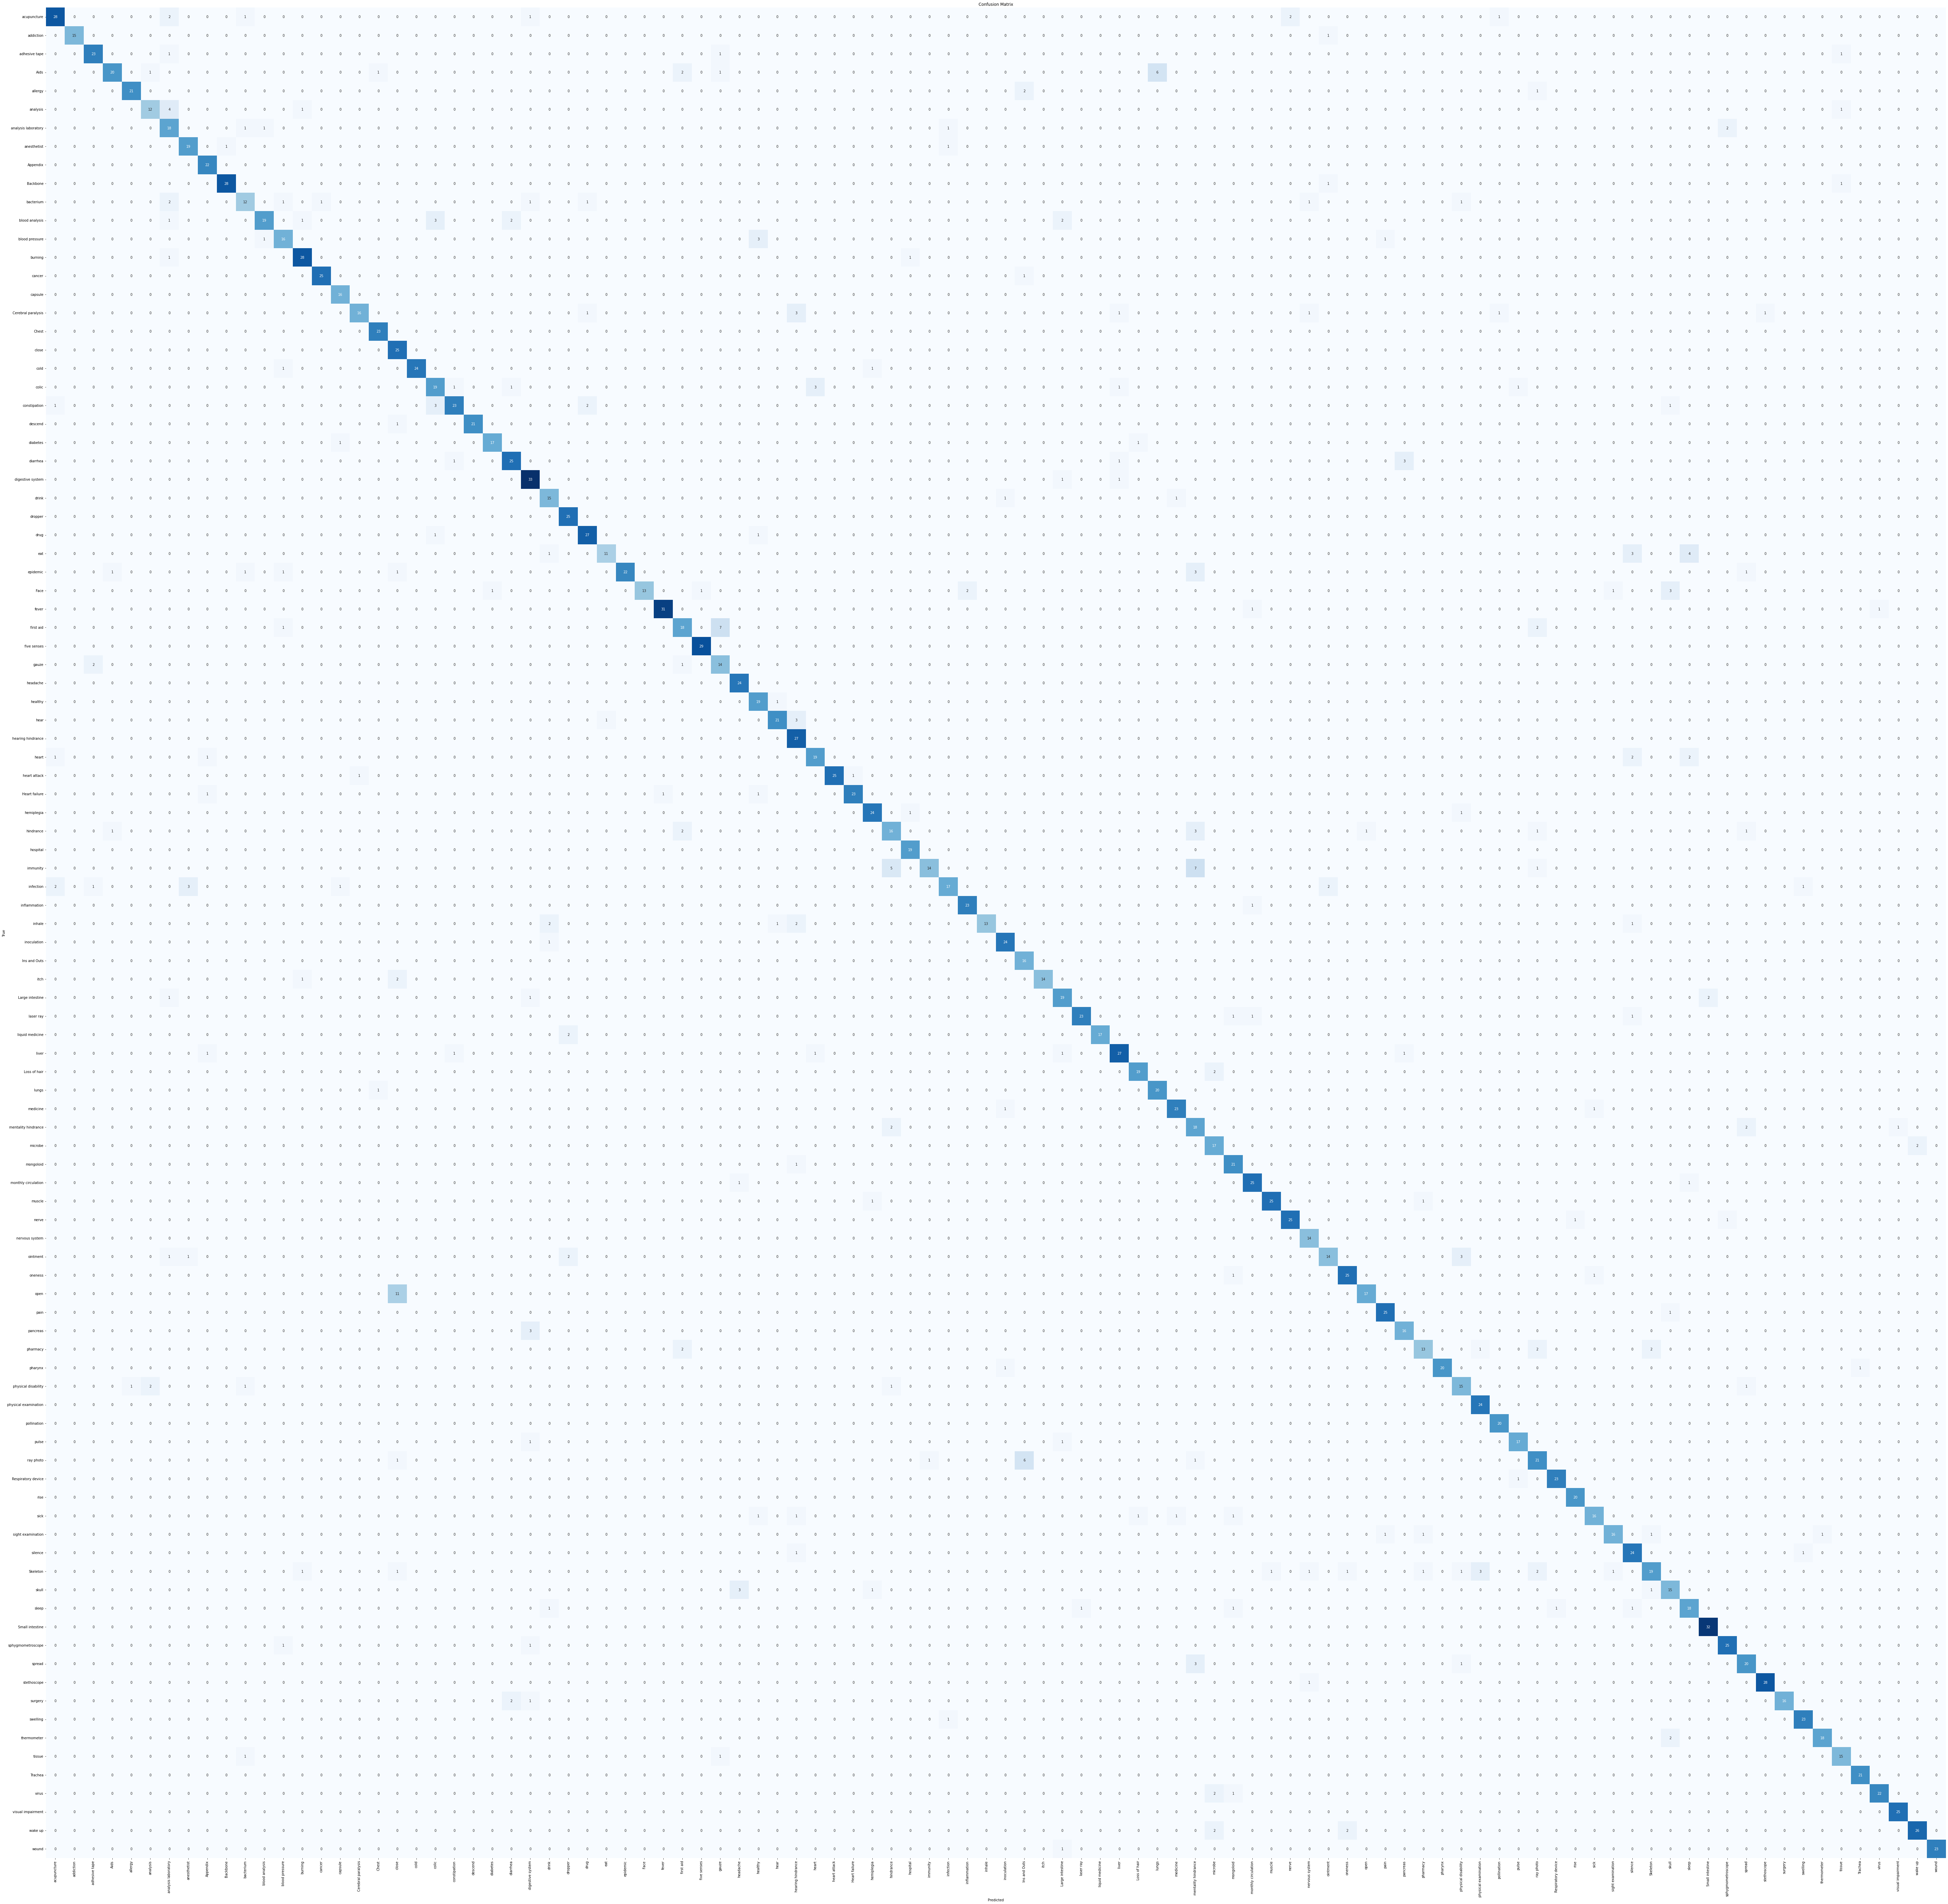

In [19]:
# Compute the confusion matrix
cm = confusion_matrix(ytrue_lstm, yhat_lstm)

# Create the heatmap plot
plt.figure(figsize=(100, 100))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

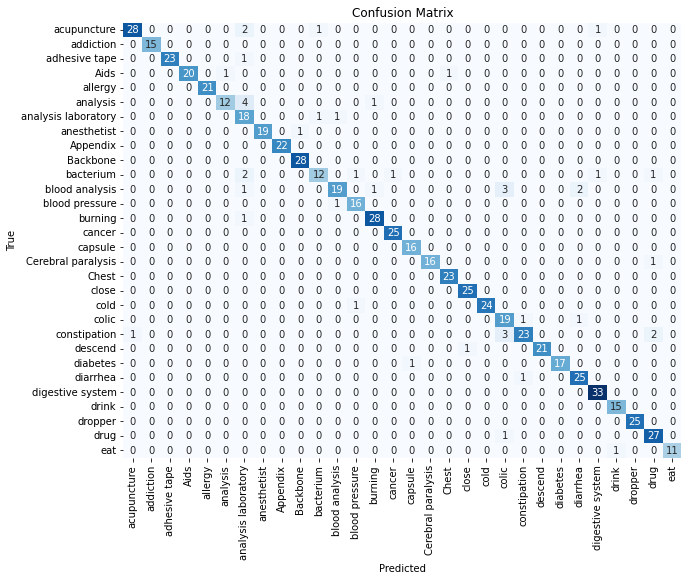

In [20]:
selected_actions = actions[:30]  # Select the first 30 actions

# Compute the confusion matrix
cm = confusion_matrix(ytrue_lstm, yhat_lstm)

# Create the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm[:30, :30], annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=selected_actions, yticklabels=selected_actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 7.2 Conv1d + LSTM 

In [21]:
model_convlstm = Sequential()

model_convlstm.add(Input(shape=(20,1662))) 
model_convlstm.add(Conv1D(128, # Filters
                 5, # Kernel Size
                 padding='same',
                 activation='relu',
                 strides=1))
model_convlstm.add(MaxPooling1D(pool_size=4))
model_convlstm.add(LSTM(64, return_sequences=False))
model_convlstm.add(Dense(32, activation='relu'))
model_convlstm.add(Dense(units=len(actions), activation='softmax'))





In [17]:
model_convlstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 128)           1063808   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 100)               3300      
                                                                 
Total params: 1,118,596
Trainable params: 1,118,596
Non-trainable params: 0
______________________________________________

In [18]:
log_dir = os.path.join('Logs/Conv1d_LSTM_custom')
tb_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,
                          update_freq='epoch',
                          profile_batch=0) ## !tensorboard --logdir=.
mc = ModelCheckpoint('Models/Conv1d_LSTM_custom.h5', monitor='val_categorical_accuracy', mode='max', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1,patience=50)
callbacks = [tb_callback,mc,es]

In [22]:
model_convlstm.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [145]:
model_convlstm.fit(X_train, y_train, epochs=2000, callbacks=[callbacks],batch_size=4,validation_data=(X_test,y_test))

Epoch 1/2000
2397/2400 [============================>.] - ETA: 0s - loss: 4.5659 - categorical_accuracy: 0.0132
Epoch 1: val_categorical_accuracy improved from -inf to 0.00875, saving model to Models\Conv1d_LSTM_custom.h5
2400/2400 [==============================] - 73s 10ms/step - loss: 4.5661 - categorical_accuracy: 0.0132 - val_loss: 4.7270 - val_categorical_accuracy: 0.0088
Epoch 2/2000
2393/2400 [============================>.] - ETA: 0s - loss: 4.5094 - categorical_accuracy: 0.0148
Epoch 2: val_categorical_accuracy improved from 0.00875 to 0.01958, saving model to Models\Conv1d_LSTM_custom.h5
2400/2400 [==============================] - 19s 8ms/step - loss: 4.5096 - categorical_accuracy: 0.0148 - val_loss: 4.4967 - val_categorical_accuracy: 0.0196
Epoch 3/2000
2395/2400 [============================>.] - ETA: 0s - loss: 4.5004 - categorical_accuracy: 0.0190
Epoch 3: val_categorical_accuracy did not improve from 0.01958
2400/2400 [==============================] - 18s 8ms/step - l

Epoch 23/2000
2394/2400 [============================>.] - ETA: 0s - loss: 1.0828 - categorical_accuracy: 0.6464
Epoch 23: val_categorical_accuracy did not improve from 0.63875
2400/2400 [==============================] - 19s 8ms/step - loss: 1.0826 - categorical_accuracy: 0.6463 - val_loss: 1.1615 - val_categorical_accuracy: 0.6150
Epoch 24/2000
2399/2400 [============================>.] - ETA: 0s - loss: 1.0173 - categorical_accuracy: 0.6676
Epoch 24: val_categorical_accuracy improved from 0.63875 to 0.66208, saving model to Models\Conv1d_LSTM_custom.h5
2400/2400 [==============================] - 18s 8ms/step - loss: 1.0173 - categorical_accuracy: 0.6675 - val_loss: 1.0720 - val_categorical_accuracy: 0.6621
Epoch 25/2000
2393/2400 [============================>.] - ETA: 0s - loss: 0.9712 - categorical_accuracy: 0.6868
Epoch 25: val_categorical_accuracy did not improve from 0.66208
2400/2400 [==============================] - 19s 8ms/step - loss: 0.9710 - categorical_accuracy: 0.6869

Epoch 46/2000
2393/2400 [============================>.] - ETA: 0s - loss: 0.5649 - categorical_accuracy: 0.8141
Epoch 46: val_categorical_accuracy did not improve from 0.81750
2400/2400 [==============================] - 19s 8ms/step - loss: 0.5653 - categorical_accuracy: 0.8141 - val_loss: 0.6447 - val_categorical_accuracy: 0.7929
Epoch 47/2000
2394/2400 [============================>.] - ETA: 0s - loss: 0.5727 - categorical_accuracy: 0.8100
Epoch 47: val_categorical_accuracy improved from 0.81750 to 0.81875, saving model to Models\Conv1d_LSTM_custom.h5
2400/2400 [==============================] - 18s 8ms/step - loss: 0.5719 - categorical_accuracy: 0.8102 - val_loss: 0.5865 - val_categorical_accuracy: 0.8188
Epoch 48/2000
2400/2400 [==============================] - ETA: 0s - loss: 0.5743 - categorical_accuracy: 0.8165
Epoch 48: val_categorical_accuracy did not improve from 0.81875
2400/2400 [==============================] - 19s 8ms/step - loss: 0.5743 - categorical_accuracy: 0.8165

KeyboardInterrupt: 

# Load the Model CNN1D+LSTM

In [23]:
model_convlstm.load_weights('Models/Conv1d_LSTM_custom.h5')

# Evaluation using Confusion Matrix and Accuracy 

In [27]:
yhat_CNN1DLSTM = model_convlstm.predict(X_train)

300/300 [==============================] - 14s 5ms/step


In [29]:
ytrue_CNN1DLSTM = np.argmax(y_train, axis=1).tolist()
yhat_CNN1DLSTM = np.argmax(yhat_CNN1DLSTM, axis=1).tolist()

In [27]:
accuracy_score(yhat_CNN1DLSTM, ytrue_CNN1DLSTM)

0.88

# for testing

In [24]:
yhat_CNN1DLSTM = model_convlstm.predict(X_test)

75/75 [==============================] - 15s 4ms/step


In [25]:
ytrue_CNN1DLSTM = np.argmax(y_test, axis=1).tolist()
yhat_CNN1DLSTM = np.argmax(yhat_CNN1DLSTM, axis=1).tolist()

In [33]:
accuracy_score(yhat_CNN1DLSTM, ytrue_CNN1DLSTM)

0.8375

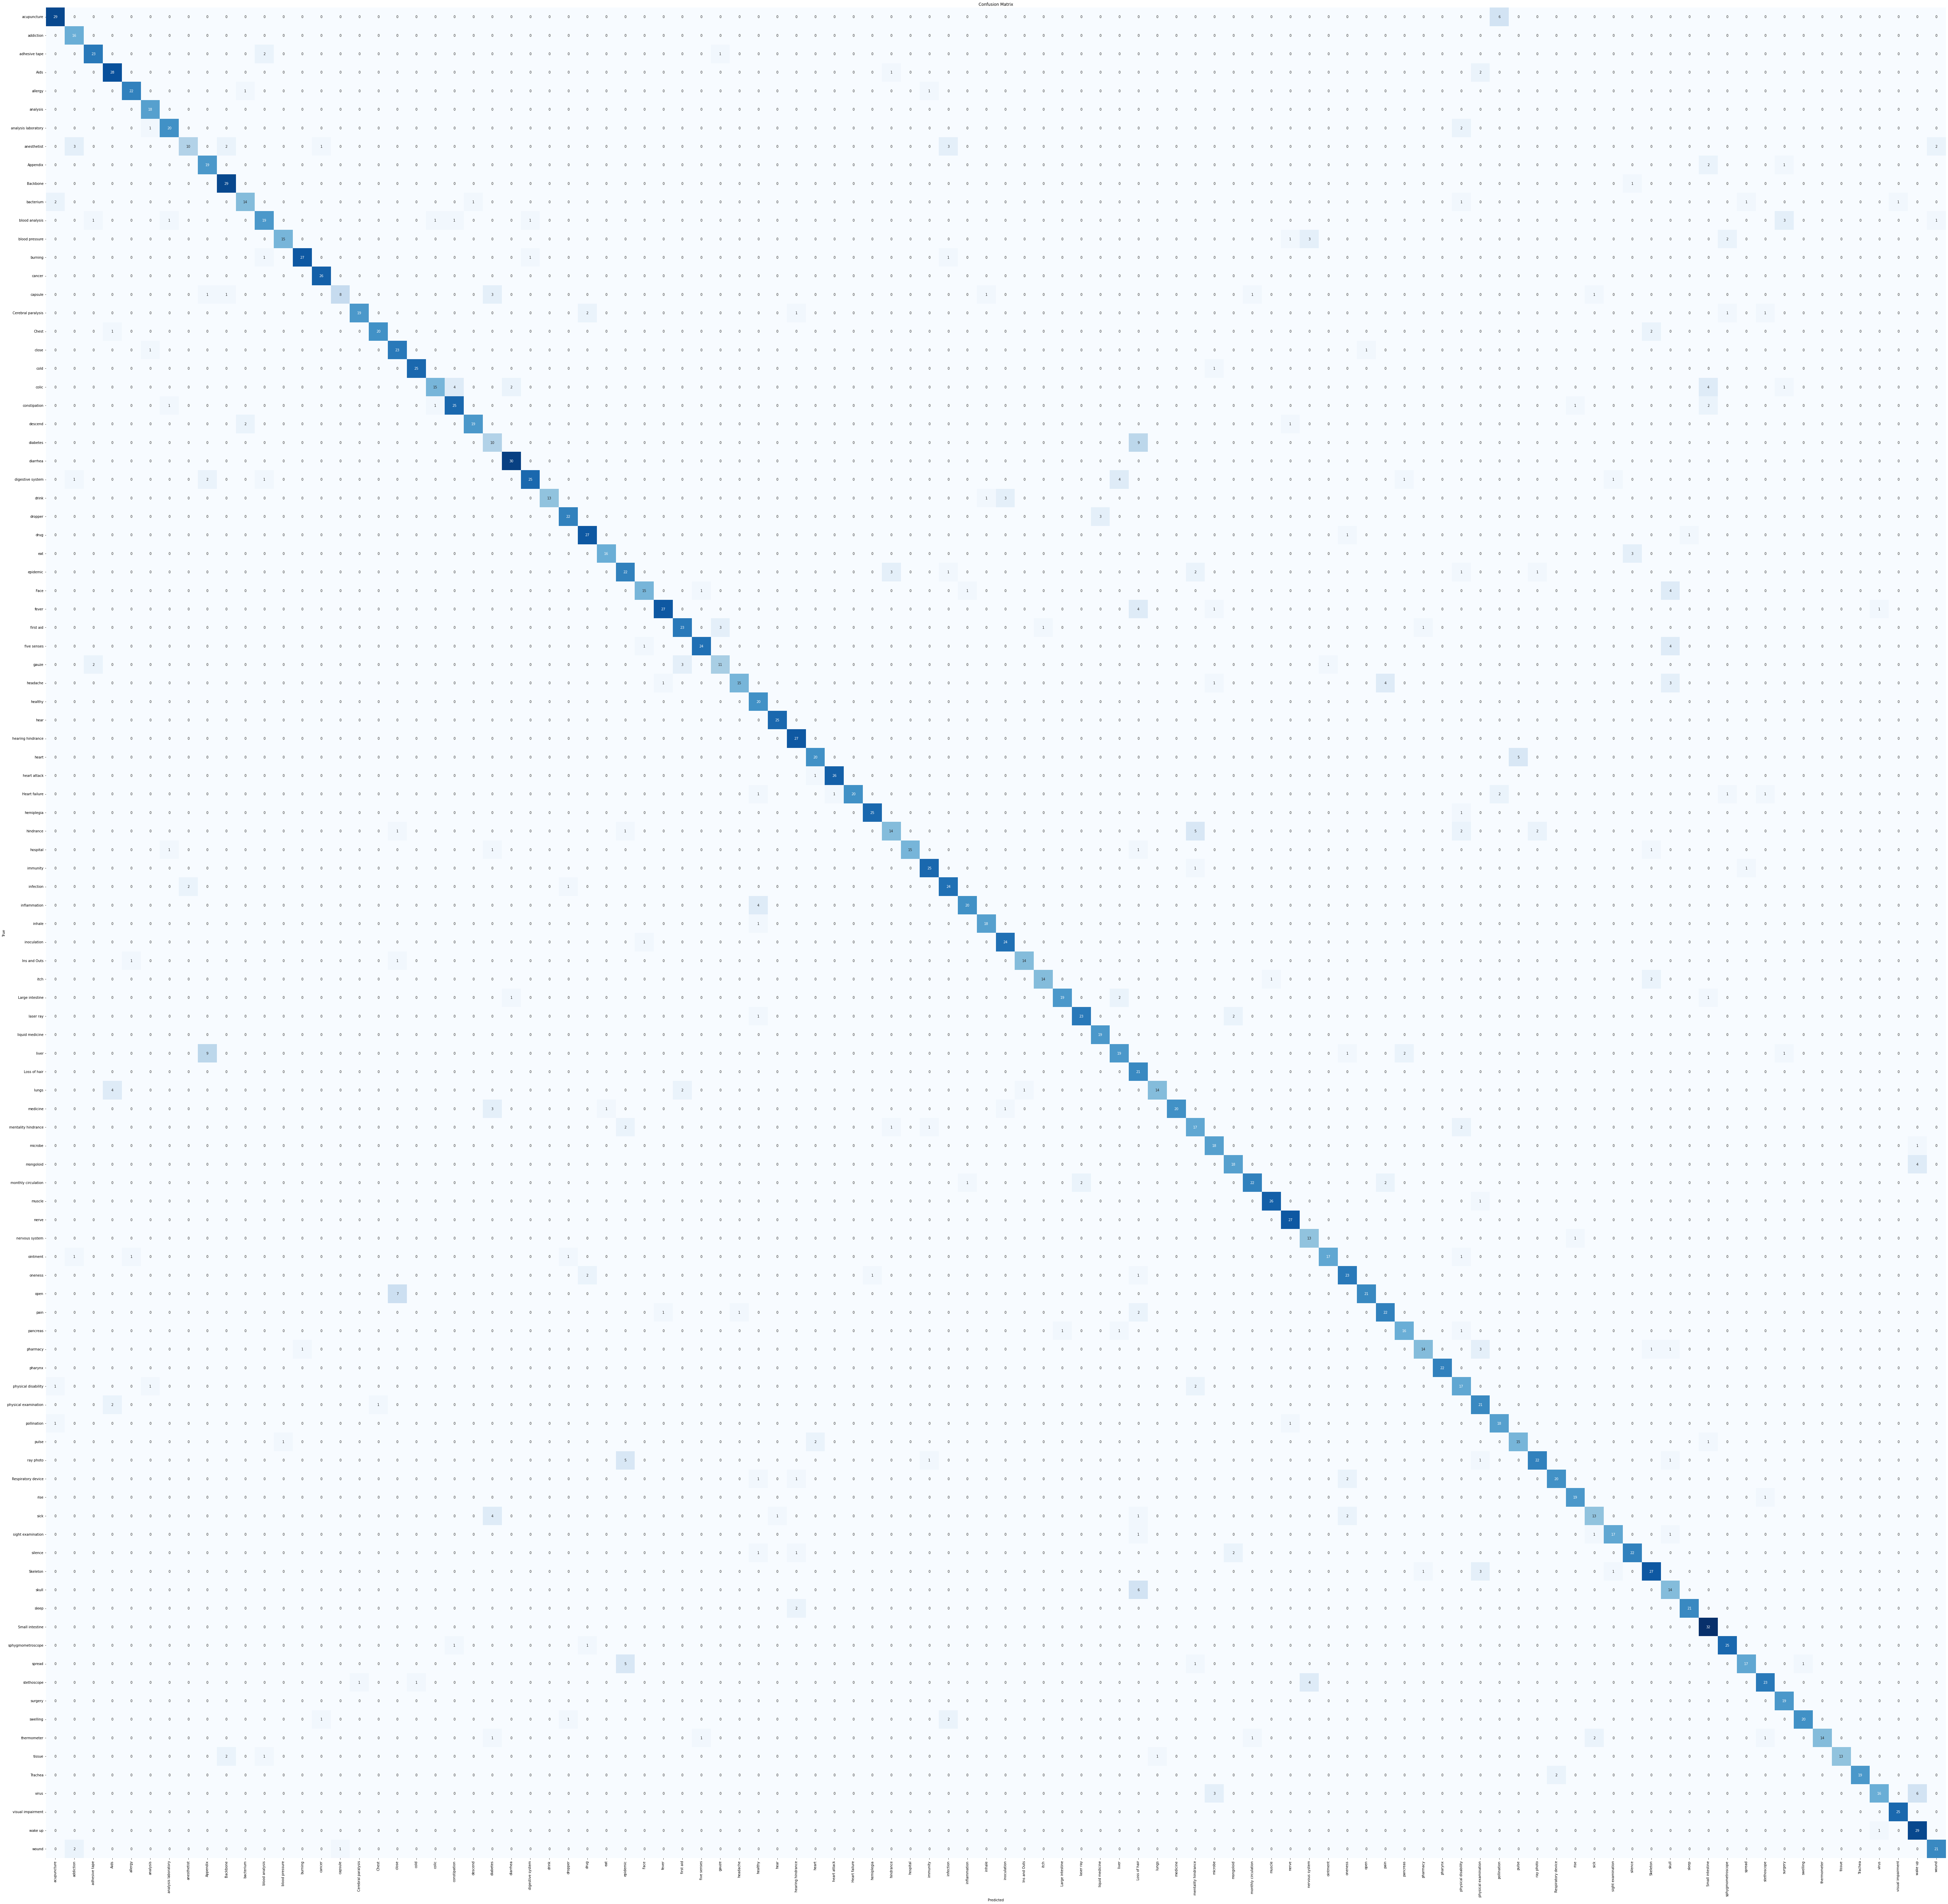

In [27]:
# Compute the confusion matrix
cm = confusion_matrix(ytrue_CNN1DLSTM, yhat_CNN1DLSTM)

# Create the heatmap plot
plt.figure(figsize=(100, 100))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

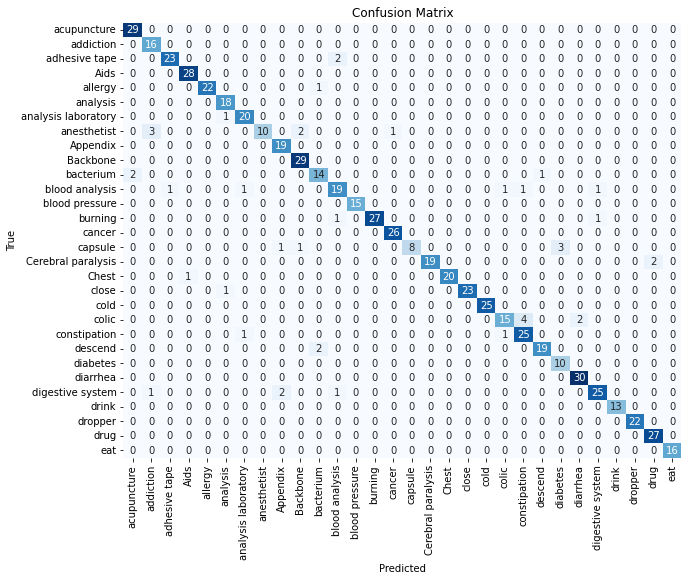

In [28]:
selected_actions = actions[:30]  # Select the first 30 actions

# Compute the confusion matrix
cm = confusion_matrix(ytrue_CNN1DLSTM, yhat_CNN1DLSTM)

# Create the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm[:30, :30], annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=selected_actions, yticklabels=selected_actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [153]:
accuracy_score(ytrue, yhat)

0.8819791666666666

# 7.4 Conv1d

In [29]:
model_conv1d = Sequential()
model_conv1d.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model_conv1d.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_conv1d.add(Dropout(0.5))
model_conv1d.add(MaxPooling1D(pool_size=4))#4
model_conv1d.add(Flatten())
model_conv1d.add(Dense(100, activation='relu'))
model_conv1d.add(Dense(actions.shape[0], activation='softmax'))
model_conv1d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
X_train.shape[1]

20

In [42]:
model_conv1d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 16, 128)           1063808   
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 128)           82048     
                                                                 
 dropout (Dropout)           (None, 12, 128)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               38500     
                                                      

In [43]:
log_dir = os.path.join('Logs/Conv1d9')
tb_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,
                          update_freq='epoch',
                          profile_batch=0) ## !tensorboard --logdir=.
mc = ModelCheckpoint('Models/model_conv1d6.h5', monitor='val_categorical_accuracy', mode='max', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1,patience=50)
callbacks = [tb_callback,mc,es]

In [30]:
model_conv1d.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [16]:
model_conv1d.fit(X_train, y_train, epochs=2000, callbacks=[callbacks],batch_size=32,validation_data=(X_test,y_test))

Epoch 1/2000
300/300 [==============================] - ETA: 0s - loss: 4.5280 - categorical_accuracy: 0.0250
Epoch 1: val_categorical_accuracy improved from -inf to 0.03625, saving model to Models\model_conv1d6.h5
300/300 [==============================] - 29s 33ms/step - loss: 4.5280 - categorical_accuracy: 0.0250 - val_loss: 4.3149 - val_categorical_accuracy: 0.0362
Epoch 2/2000
300/300 [==============================] - ETA: 0s - loss: 3.8177 - categorical_accuracy: 0.0801
Epoch 2: val_categorical_accuracy improved from 0.03625 to 0.12875, saving model to Models\model_conv1d6.h5
300/300 [==============================] - 6s 20ms/step - loss: 3.8177 - categorical_accuracy: 0.0801 - val_loss: 3.5822 - val_categorical_accuracy: 0.1287
Epoch 3/2000
293/300 [============================>.] - ETA: 0s - loss: 3.2775 - categorical_accuracy: 0.1319
Epoch 3: val_categorical_accuracy improved from 0.12875 to 0.13208, saving model to Models\model_conv1d6.h5
300/300 [===========================

Epoch 24/2000
296/300 [============================>.] - ETA: 0s - loss: 1.4509 - categorical_accuracy: 0.5249
Epoch 24: val_categorical_accuracy improved from 0.55500 to 0.56542, saving model to Models\model_conv1d6.h5
300/300 [==============================] - 4s 13ms/step - loss: 1.4504 - categorical_accuracy: 0.5252 - val_loss: 1.5845 - val_categorical_accuracy: 0.5654
Epoch 25/2000
297/300 [============================>.] - ETA: 0s - loss: 1.3702 - categorical_accuracy: 0.5446
Epoch 25: val_categorical_accuracy did not improve from 0.56542
300/300 [==============================] - 4s 15ms/step - loss: 1.3714 - categorical_accuracy: 0.5442 - val_loss: 1.5990 - val_categorical_accuracy: 0.5408
Epoch 26/2000
294/300 [============================>.] - ETA: 0s - loss: 1.3840 - categorical_accuracy: 0.5462
Epoch 26: val_categorical_accuracy did not improve from 0.56542
300/300 [==============================] - 4s 14ms/step - loss: 1.3846 - categorical_accuracy: 0.5465 - val_loss: 1.61

Epoch 48/2000
298/300 [============================>.] - ETA: 0s - loss: 0.9354 - categorical_accuracy: 0.6842
Epoch 48: val_categorical_accuracy did not improve from 0.72833
300/300 [==============================] - 5s 15ms/step - loss: 0.9348 - categorical_accuracy: 0.6846 - val_loss: 1.1453 - val_categorical_accuracy: 0.6950
Epoch 49/2000
297/300 [============================>.] - ETA: 0s - loss: 0.9138 - categorical_accuracy: 0.6953
Epoch 49: val_categorical_accuracy did not improve from 0.72833
300/300 [==============================] - 4s 13ms/step - loss: 0.9152 - categorical_accuracy: 0.6950 - val_loss: 1.0801 - val_categorical_accuracy: 0.7100
Epoch 50/2000
298/300 [============================>.] - ETA: 0s - loss: 0.8737 - categorical_accuracy: 0.7070
Epoch 50: val_categorical_accuracy did not improve from 0.72833
300/300 [==============================] - 3s 11ms/step - loss: 0.8743 - categorical_accuracy: 0.7063 - val_loss: 1.1228 - val_categorical_accuracy: 0.6892
Epoch 5

KeyboardInterrupt: 

# Load the Model CNN1D

In [31]:
model_conv1d.load_weights('Models/model_conv1d6.h5')

# Evaluation using Confusion Matrix and Accuracy

In [46]:
yhat_conv1d = model_conv1d.predict(X_train)

300/300 [==============================] - 8s 5ms/step


In [47]:
ytrue_conv1d = np.argmax(y_train, axis=1).tolist()
yhat_conv1d = np.argmax(yhat_conv1d, axis=1).tolist()

In [48]:
accuracy_score(ytrue_conv1d, yhat_conv1d)

0.8523958333333334

# for testing

In [32]:
yhat_conv1d = model_conv1d.predict(X_test)

75/75 [==============================] - 3s 4ms/step


In [34]:
ytrue_conv1d = np.argmax(y_test, axis=1).tolist()
yhat_conv1d = np.argmax(yhat_conv1d, axis=1).tolist()

In [45]:
accuracy_score(ytrue_conv1d, yhat_conv1d)

0.80125

# confusion matrix

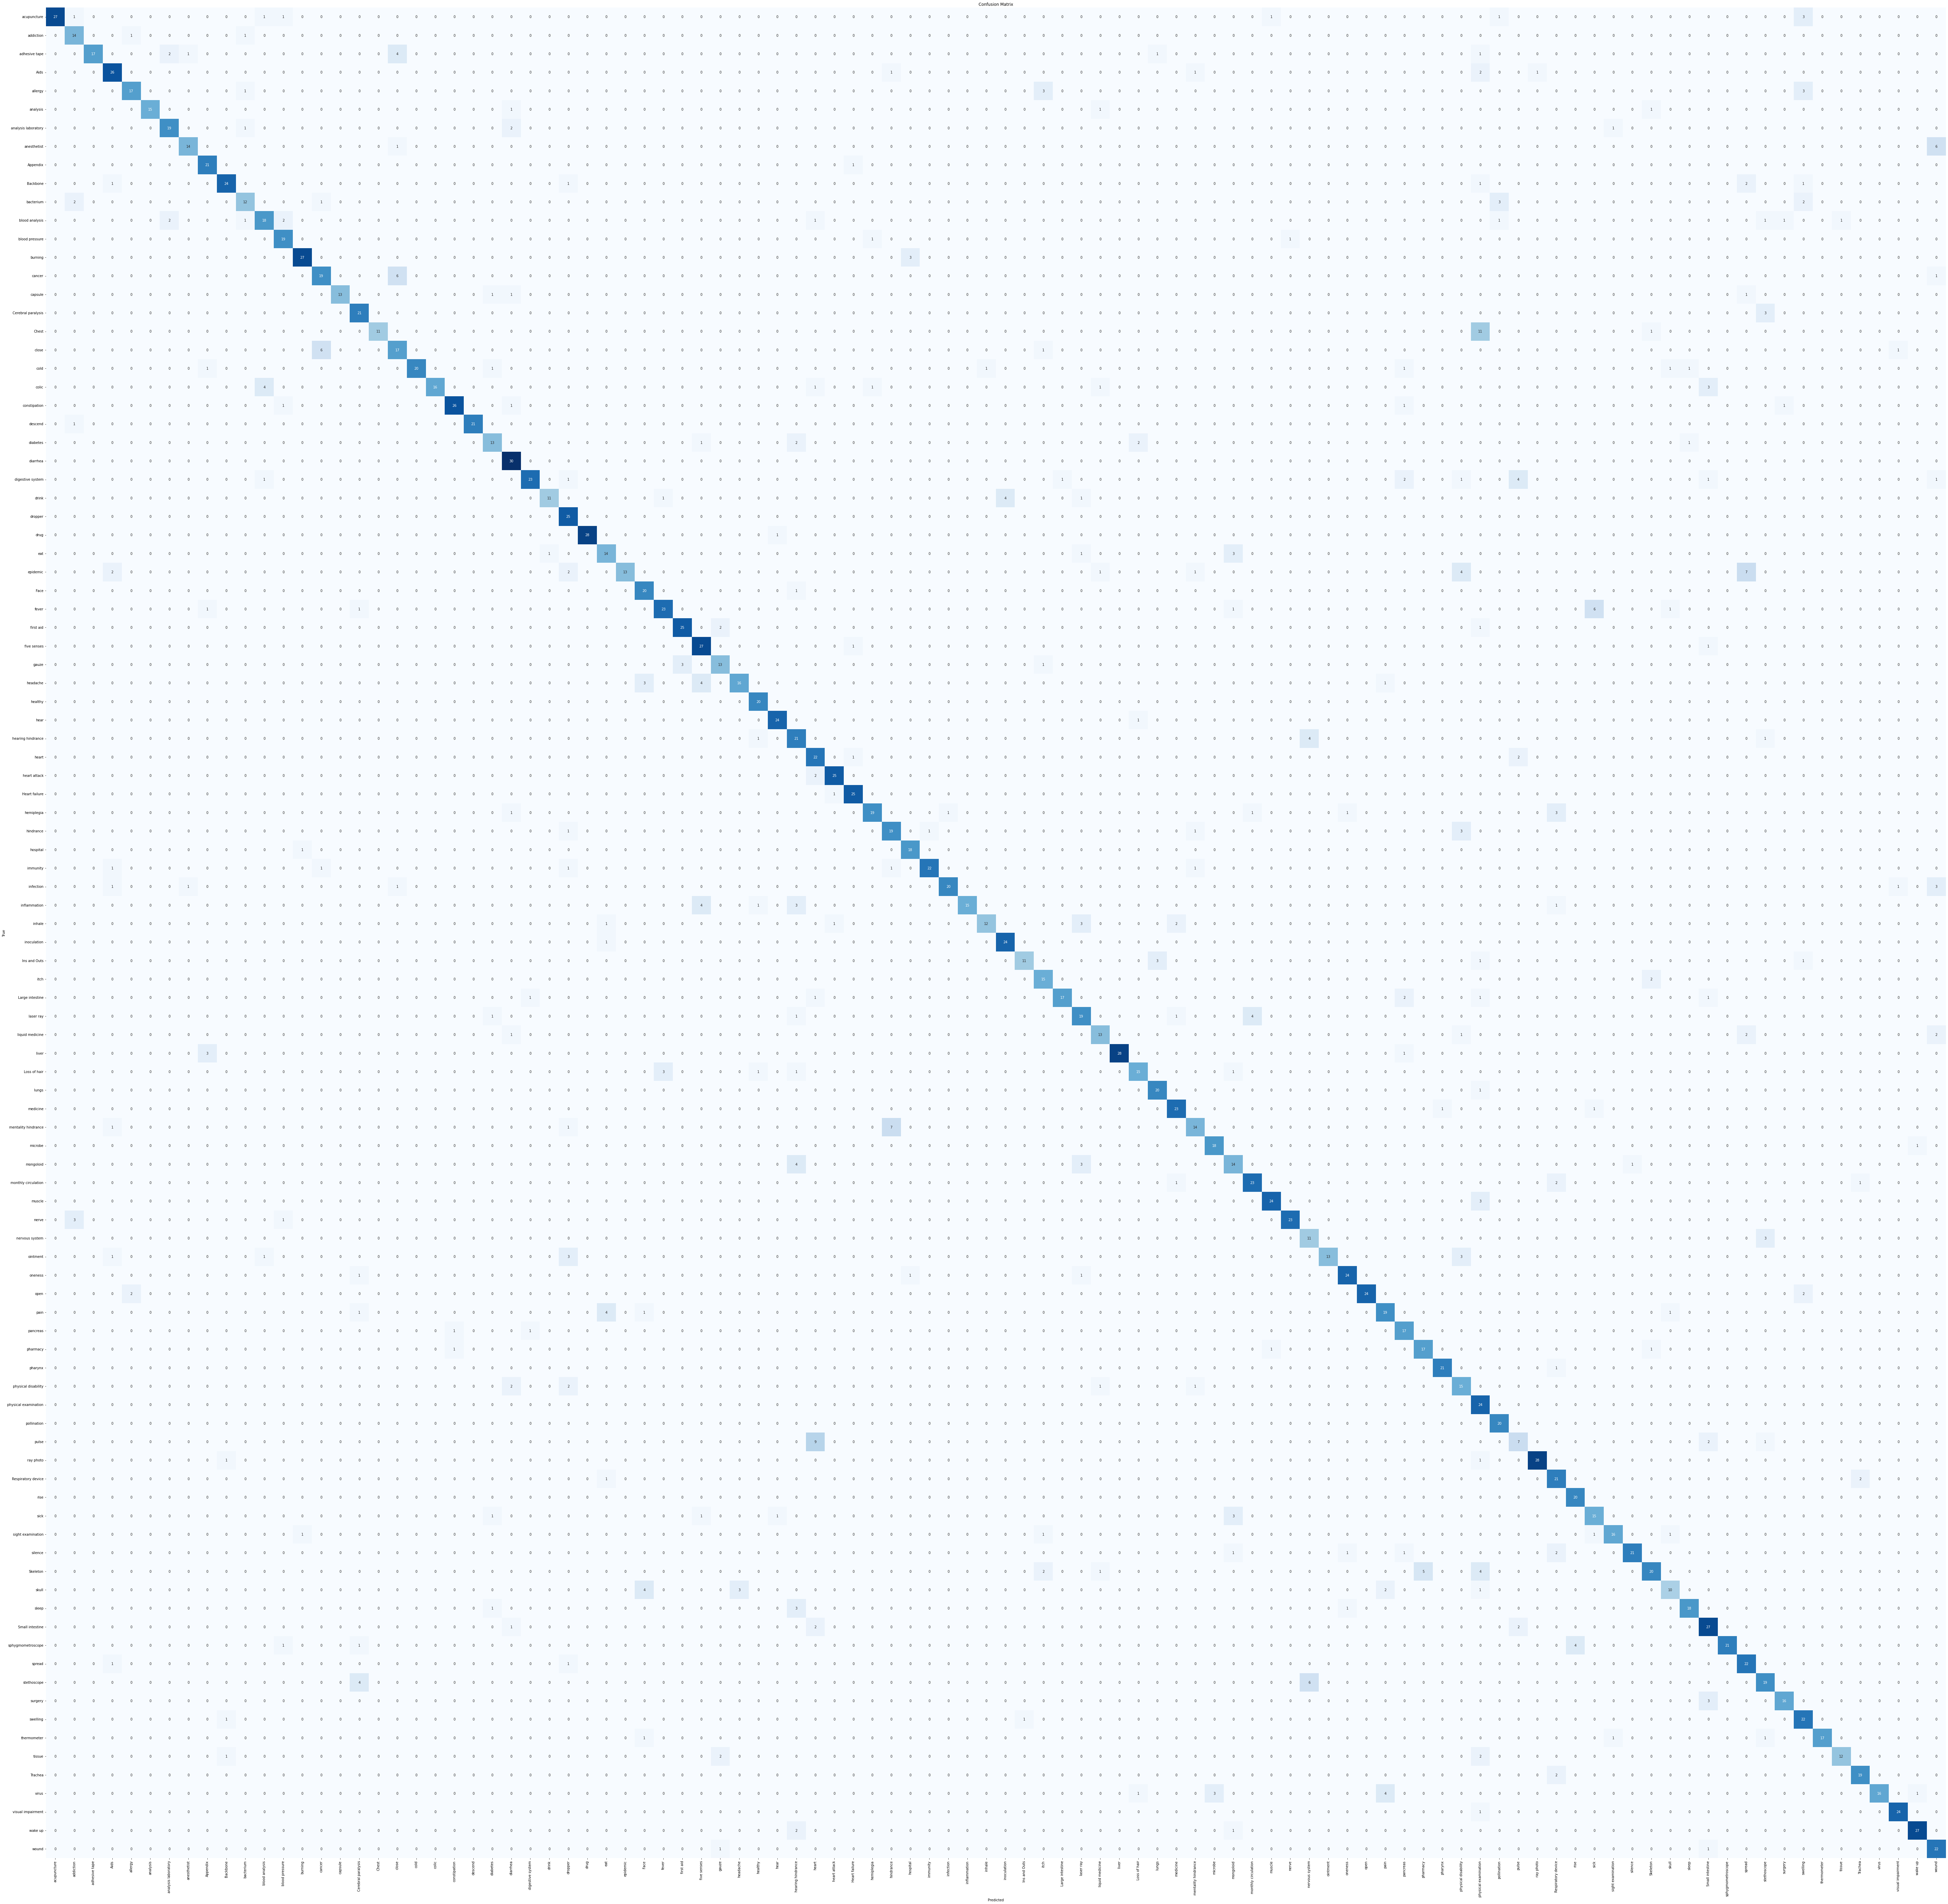

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(ytrue_conv1d, yhat_conv1d)

# Create the heatmap plot
plt.figure(figsize=(100, 100))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

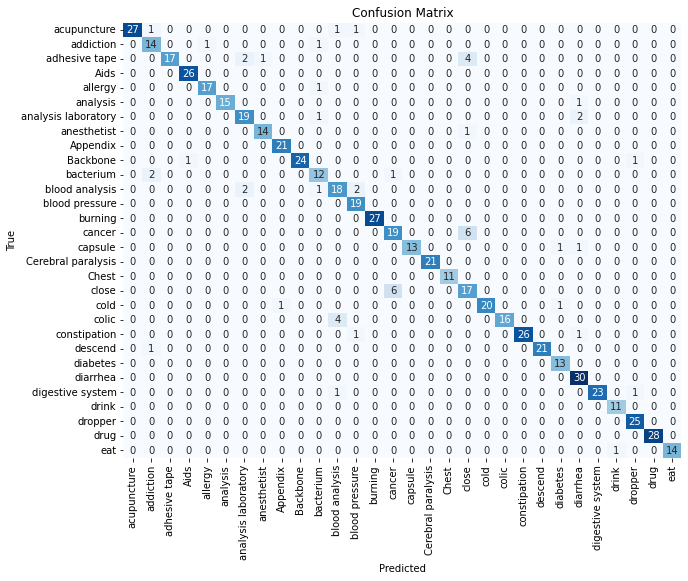

In [37]:
selected_actions = actions[:30]  # Select the first 30 actions

# Compute the confusion matrix
cm = confusion_matrix(ytrue_conv1d, yhat_conv1d)

# Create the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm[:30, :30], annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=selected_actions, yticklabels=selected_actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 7.6 Transformer (Future Work)

In [36]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    
    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [37]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(actions.shape[0], activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [38]:
input_shape = X_train.shape[1:]

In [39]:
model_transformer = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)
model_transformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 1662)]   0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 20, 1662)    3324        ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 20, 1662)    6812286     ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

 mbda)                                                            'tf.__operators__.add_5[0][0]'] 
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 20, 1662)    3324        ['tf.__operators__.add_6[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv1d_6 (Conv1D)              (None, 20, 4)        6652        ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_7 (Dropout)            (None, 20, 4)        0           ['conv1d_6[0][0]']               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 20, 1662)     8310        ['dropout_7[0][0]']              
          

In [40]:
model_transformer = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)
model_transformer.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 20, 1662)]   0           []                               
                                                                                                  
 layer_normalization_32 (LayerN  (None, 20, 1662)    3324        ['input_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_16 (Multi  (None, 20, 1662)    6812286     ['layer_normalization_32[0][0]', 
 HeadAttention)                                                   'layer_normalization_32[0][0]'] 
                                                                                            

 ambda)                                                           'tf.__operators__.add_37[0][0]']
                                                                                                  
 layer_normalization_39 (LayerN  (None, 20, 1662)    3324        ['tf.__operators__.add_38[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv1d_38 (Conv1D)             (None, 20, 4)        6652        ['layer_normalization_39[0][0]'] 
                                                                                                  
 dropout_43 (Dropout)           (None, 20, 4)        0           ['conv1d_38[0][0]']              
                                                                                                  
 conv1d_39 (Conv1D)             (None, 20, 1662)     8310        ['dropout_43[0][0]']             
          

In [41]:
model_transformer.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)

In [46]:
log_dir = os.path.join('Logs/transformer_encoder3')
tb_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,
                          update_freq='epoch',
                          profile_batch=0) ## !tensorboard --logdir=.
mc = ModelCheckpoint('Models/model_transformer_encoder3.h5', monitor='val_categorical_accuracy', mode='max', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1,patience=100)
callbacks = [tb_callback,mc,es]

In [47]:
model_transformer=tf.keras.models.load_model(r'D:\Year 3\GP\GP100Word\Arabic_ActionDetectionforSignLanguage(100)\Models\model_transformer_encoder3.h5')

In [61]:
model_transformer.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size=8,
    callbacks=callbacks,
)#13

Epoch 1/2000
124/125 [============================>.] - ETA: 0s - loss: 2.5705 - categorical_accuracy: 0.0837
Epoch 1: val_categorical_accuracy improved from -inf to 0.08800, saving model to Models\model_transformer_encoder37.h5
125/125 [==============================] - 16s 85ms/step - loss: 2.5707 - categorical_accuracy: 0.0832 - val_loss: 2.5630 - val_categorical_accuracy: 0.0880
Epoch 2/2000
124/125 [============================>.] - ETA: 0s - loss: 2.5617 - categorical_accuracy: 0.0968
Epoch 2: val_categorical_accuracy improved from 0.08800 to 0.09600, saving model to Models\model_transformer_encoder37.h5
125/125 [==============================] - 12s 99ms/step - loss: 2.5617 - categorical_accuracy: 0.0972 - val_loss: 2.5585 - val_categorical_accuracy: 0.0960
Epoch 3/2000
125/125 [==============================] - ETA: 0s - loss: 2.5584 - categorical_accuracy: 0.0892
Epoch 3: val_categorical_accuracy did not improve from 0.09600
125/125 [==============================] - 14s 110ms

Epoch 25/2000
125/125 [==============================] - ETA: 0s - loss: 2.3162 - categorical_accuracy: 0.1393
Epoch 25: val_categorical_accuracy did not improve from 0.12000
125/125 [==============================] - 8s 66ms/step - loss: 2.3162 - categorical_accuracy: 0.1393 - val_loss: 2.3128 - val_categorical_accuracy: 0.1000
Epoch 26/2000
124/125 [============================>.] - ETA: 0s - loss: 2.2906 - categorical_accuracy: 0.1361
Epoch 26: val_categorical_accuracy improved from 0.12000 to 0.16400, saving model to Models\model_transformer_encoder37.h5
125/125 [==============================] - 9s 69ms/step - loss: 2.2900 - categorical_accuracy: 0.1363 - val_loss: 2.3068 - val_categorical_accuracy: 0.1640
Epoch 27/2000
124/125 [============================>.] - ETA: 0s - loss: 2.2836 - categorical_accuracy: 0.1280
Epoch 27: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 10s 80ms/step - loss: 2.2852 - categorical_accuracy: 0.1273 -

Epoch 50/2000
125/125 [==============================] - ETA: 0s - loss: 2.0651 - categorical_accuracy: 0.1653
Epoch 50: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 68ms/step - loss: 2.0651 - categorical_accuracy: 0.1653 - val_loss: 2.1725 - val_categorical_accuracy: 0.1520
Epoch 51/2000
124/125 [============================>.] - ETA: 0s - loss: 2.0619 - categorical_accuracy: 0.1865
Epoch 51: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 72ms/step - loss: 2.0613 - categorical_accuracy: 0.1854 - val_loss: 2.1340 - val_categorical_accuracy: 0.1600
Epoch 52/2000
124/125 [============================>.] - ETA: 0s - loss: 2.0293 - categorical_accuracy: 0.2167
Epoch 52: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 8s 67ms/step - loss: 2.0295 - categorical_accuracy: 0.2174 - val_loss: 2.4076 - val_categorical_accuracy: 0.1480
Epoch 5

Epoch 75/2000
124/125 [============================>.] - ETA: 0s - loss: 1.9619 - categorical_accuracy: 0.2177
Epoch 75: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 70ms/step - loss: 1.9599 - categorical_accuracy: 0.2184 - val_loss: 2.1990 - val_categorical_accuracy: 0.1480
Epoch 76/2000
125/125 [==============================] - ETA: 0s - loss: 1.9792 - categorical_accuracy: 0.2034
Epoch 76: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 73ms/step - loss: 1.9792 - categorical_accuracy: 0.2034 - val_loss: 2.2396 - val_categorical_accuracy: 0.1240
Epoch 77/2000
124/125 [============================>.] - ETA: 0s - loss: 1.9670 - categorical_accuracy: 0.2157
Epoch 77: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 12s 93ms/step - loss: 1.9652 - categorical_accuracy: 0.2164 - val_loss: 2.1556 - val_categorical_accuracy: 0.1480
Epoch 

Epoch 100/2000
125/125 [==============================] - ETA: 0s - loss: 1.9019 - categorical_accuracy: 0.2455
Epoch 100: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 72ms/step - loss: 1.9019 - categorical_accuracy: 0.2455 - val_loss: 2.0166 - val_categorical_accuracy: 0.1160
Epoch 101/2000
124/125 [============================>.] - ETA: 0s - loss: 1.8647 - categorical_accuracy: 0.2399
Epoch 101: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 70ms/step - loss: 1.8631 - categorical_accuracy: 0.2415 - val_loss: 2.0139 - val_categorical_accuracy: 0.1160
Epoch 102/2000
124/125 [============================>.] - ETA: 0s - loss: 1.8945 - categorical_accuracy: 0.2319
Epoch 102: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 9s 69ms/step - loss: 1.8934 - categorical_accuracy: 0.2325 - val_loss: 2.0363 - val_categorical_accuracy: 0.1480
E

Epoch 125/2000
125/125 [==============================] - ETA: 0s - loss: 1.7867 - categorical_accuracy: 0.2685
Epoch 125: val_categorical_accuracy did not improve from 0.16400
125/125 [==============================] - 10s 80ms/step - loss: 1.7867 - categorical_accuracy: 0.2685 - val_loss: 2.1440 - val_categorical_accuracy: 0.1480
Epoch 126/2000
124/125 [============================>.] - ETA: 0s - loss: 1.7905 - categorical_accuracy: 0.2429
Epoch 126: val_categorical_accuracy improved from 0.16400 to 0.16800, saving model to Models\model_transformer_encoder37.h5
125/125 [==============================] - 10s 77ms/step - loss: 1.7915 - categorical_accuracy: 0.2415 - val_loss: 2.1737 - val_categorical_accuracy: 0.1680
Epoch 127/2000
124/125 [============================>.] - ETA: 0s - loss: 1.8039 - categorical_accuracy: 0.2490
Epoch 127: val_categorical_accuracy did not improve from 0.16800
125/125 [==============================] - 11s 86ms/step - loss: 1.8019 - categorical_accuracy: 

KeyboardInterrupt: 

In [43]:
model_transformer.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size=8,
    callbacks=callbacks,
)#4

Epoch 1/2000
29/29 [==============================] - ETA: 0s - loss: 1.1165 - categorical_accuracy: 0.3348
Epoch 1: val_categorical_accuracy improved from -inf to 0.25862, saving model to Models\model_transformer_encoder36.h5
29/29 [==============================] - 27s 313ms/step - loss: 1.1165 - categorical_accuracy: 0.3348 - val_loss: 1.0957 - val_categorical_accuracy: 0.2586
Epoch 2/2000
29/29 [==============================] - ETA: 0s - loss: 1.0969 - categorical_accuracy: 0.4043
Epoch 2: val_categorical_accuracy improved from 0.25862 to 0.34483, saving model to Models\model_transformer_encoder36.h5
29/29 [==============================] - 10s 356ms/step - loss: 1.0969 - categorical_accuracy: 0.4043 - val_loss: 1.0988 - val_categorical_accuracy: 0.3448
Epoch 3/2000
29/29 [==============================] - ETA: 0s - loss: 1.1005 - categorical_accuracy: 0.2739
Epoch 3: val_categorical_accuracy improved from 0.34483 to 0.36207, saving model to Models\model_transformer_encoder36.h5
2

Epoch 25/2000
29/29 [==============================] - ETA: 0s - loss: 0.7605 - categorical_accuracy: 0.6348
Epoch 25: val_categorical_accuracy did not improve from 0.62069
29/29 [==============================] - 7s 242ms/step - loss: 0.7605 - categorical_accuracy: 0.6348 - val_loss: 0.6611 - val_categorical_accuracy: 0.6034
Epoch 26/2000
29/29 [==============================] - ETA: 0s - loss: 0.7471 - categorical_accuracy: 0.6478
Epoch 26: val_categorical_accuracy did not improve from 0.62069
29/29 [==============================] - 6s 206ms/step - loss: 0.7471 - categorical_accuracy: 0.6478 - val_loss: 0.6617 - val_categorical_accuracy: 0.6034
Epoch 27/2000
29/29 [==============================] - ETA: 0s - loss: 0.7249 - categorical_accuracy: 0.6174
Epoch 27: val_categorical_accuracy did not improve from 0.62069
29/29 [==============================] - 8s 277ms/step - loss: 0.7249 - categorical_accuracy: 0.6174 - val_loss: 0.6344 - val_categorical_accuracy: 0.6207
Epoch 28/2000
29

Epoch 50/2000
29/29 [==============================] - ETA: 0s - loss: 0.6364 - categorical_accuracy: 0.6435
Epoch 50: val_categorical_accuracy did not improve from 0.65517
29/29 [==============================] - 5s 186ms/step - loss: 0.6364 - categorical_accuracy: 0.6435 - val_loss: 0.6206 - val_categorical_accuracy: 0.6379
Epoch 51/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.6112 - categorical_accuracy: 0.6875
Epoch 51: val_categorical_accuracy improved from 0.65517 to 0.67241, saving model to Models\model_transformer_encoder36.h5
29/29 [==============================] - 7s 236ms/step - loss: 0.6120 - categorical_accuracy: 0.6870 - val_loss: 0.5300 - val_categorical_accuracy: 0.6724
Epoch 52/2000
29/29 [==============================] - ETA: 0s - loss: 0.5385 - categorical_accuracy: 0.6957
Epoch 52: val_categorical_accuracy did not improve from 0.67241
29/29 [==============================] - 6s 216ms/step - loss: 0.5385 - categorical_accuracy: 0.6957 - val_loss:

Epoch 75/2000
29/29 [==============================] - ETA: 0s - loss: 0.5540 - categorical_accuracy: 0.7000
Epoch 75: val_categorical_accuracy did not improve from 0.67241
29/29 [==============================] - 6s 209ms/step - loss: 0.5540 - categorical_accuracy: 0.7000 - val_loss: 0.5897 - val_categorical_accuracy: 0.6034
Epoch 76/2000
29/29 [==============================] - ETA: 0s - loss: 0.5487 - categorical_accuracy: 0.6957
Epoch 76: val_categorical_accuracy did not improve from 0.67241
29/29 [==============================] - 6s 219ms/step - loss: 0.5487 - categorical_accuracy: 0.6957 - val_loss: 0.4957 - val_categorical_accuracy: 0.6552
Epoch 77/2000
29/29 [==============================] - ETA: 0s - loss: 0.5151 - categorical_accuracy: 0.7174
Epoch 77: val_categorical_accuracy did not improve from 0.67241
29/29 [==============================] - 5s 188ms/step - loss: 0.5151 - categorical_accuracy: 0.7174 - val_loss: 0.4983 - val_categorical_accuracy: 0.6552
Epoch 78/2000
28

Epoch 100/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.5503 - categorical_accuracy: 0.7098
Epoch 100: val_categorical_accuracy did not improve from 0.70690
29/29 [==============================] - 9s 302ms/step - loss: 0.5558 - categorical_accuracy: 0.7043 - val_loss: 0.6182 - val_categorical_accuracy: 0.6724
Epoch 101/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.4989 - categorical_accuracy: 0.7411
Epoch 101: val_categorical_accuracy did not improve from 0.70690
29/29 [==============================] - 9s 305ms/step - loss: 0.5128 - categorical_accuracy: 0.7261 - val_loss: 0.5441 - val_categorical_accuracy: 0.6552
Epoch 102/2000
29/29 [==============================] - ETA: 0s - loss: 0.4905 - categorical_accuracy: 0.7261
Epoch 102: val_categorical_accuracy did not improve from 0.70690
29/29 [==============================] - 7s 226ms/step - loss: 0.4905 - categorical_accuracy: 0.7261 - val_loss: 0.5743 - val_categorical_accuracy: 0.6897
Epoch 103/

29/29 [==============================] - 6s 194ms/step - loss: 0.3924 - categorical_accuracy: 0.7913 - val_loss: 0.9234 - val_categorical_accuracy: 0.5690
Epoch 125/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.7354 - categorical_accuracy: 0.6652
Epoch 125: val_categorical_accuracy did not improve from 0.74138
29/29 [==============================] - 5s 188ms/step - loss: 0.7395 - categorical_accuracy: 0.6609 - val_loss: 0.9099 - val_categorical_accuracy: 0.4655
Epoch 126/2000
29/29 [==============================] - ETA: 0s - loss: 0.5456 - categorical_accuracy: 0.7391
Epoch 126: val_categorical_accuracy did not improve from 0.74138
29/29 [==============================] - 7s 231ms/step - loss: 0.5456 - categorical_accuracy: 0.7391 - val_loss: 0.6847 - val_categorical_accuracy: 0.5862
Epoch 127/2000
29/29 [==============================] - ETA: 0s - loss: 0.4813 - categorical_accuracy: 0.7261
Epoch 127: val_categorical_accuracy did not improve from 0.74138
29/29 [===

Epoch 174/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.3511 - categorical_accuracy: 0.8259
Epoch 174: val_categorical_accuracy did not improve from 0.75862
29/29 [==============================] - 7s 240ms/step - loss: 0.3488 - categorical_accuracy: 0.8304 - val_loss: 0.4835 - val_categorical_accuracy: 0.6552
Epoch 175/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.3497 - categorical_accuracy: 0.8170
Epoch 175: val_categorical_accuracy did not improve from 0.75862
29/29 [==============================] - 5s 183ms/step - loss: 0.3439 - categorical_accuracy: 0.8217 - val_loss: 0.4886 - val_categorical_accuracy: 0.6379
Epoch 176/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.3032 - categorical_accuracy: 0.8750
Epoch 176: val_categorical_accuracy did not improve from 0.75862
29/29 [==============================] - 5s 184ms/step - loss: 0.3173 - categorical_accuracy: 0.8696 - val_loss: 0.5778 - val_categorical_accuracy: 0.6724
Epoch 177/

Epoch 199/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.3514 - categorical_accuracy: 0.8527
Epoch 199: val_categorical_accuracy did not improve from 0.75862
29/29 [==============================] - 5s 173ms/step - loss: 0.3530 - categorical_accuracy: 0.8478 - val_loss: 1.1989 - val_categorical_accuracy: 0.6034
Epoch 200/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.3096 - categorical_accuracy: 0.8527
Epoch 200: val_categorical_accuracy did not improve from 0.75862
29/29 [==============================] - 6s 222ms/step - loss: 0.3093 - categorical_accuracy: 0.8522 - val_loss: 0.8438 - val_categorical_accuracy: 0.6379
Epoch 201/2000
28/29 [===========================>..] - ETA: 0s - loss: 0.3091 - categorical_accuracy: 0.8616
Epoch 201: val_categorical_accuracy did not improve from 0.75862
29/29 [==============================] - 4s 148ms/step - loss: 0.3031 - categorical_accuracy: 0.8652 - val_loss: 0.5166 - val_categorical_accuracy: 0.6552
Epoch 202/

KeyboardInterrupt: 

In [19]:
model_transformer.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size=8,
    callbacks=callbacks,
)

Epoch 1/2000
959/960 [============================>.] - ETA: 0s - loss: 4.6061 - categorical_accuracy: 0.0123
Epoch 1: val_categorical_accuracy improved from -inf to 0.00677, saving model to Models\model_transformer_encoder3.h5
960/960 [==============================] - 75s 53ms/step - loss: 4.6061 - categorical_accuracy: 0.0122 - val_loss: 4.6038 - val_categorical_accuracy: 0.0068
Epoch 2/2000
960/960 [==============================] - ETA: 0s - loss: 4.6044 - categorical_accuracy: 0.0115
Epoch 2: val_categorical_accuracy improved from 0.00677 to 0.01562, saving model to Models\model_transformer_encoder3.h5
960/960 [==============================] - 47s 48ms/step - loss: 4.6044 - categorical_accuracy: 0.0115 - val_loss: 4.6014 - val_categorical_accuracy: 0.0156
Epoch 3/2000
959/960 [============================>.] - ETA: 0s - loss: 4.5910 - categorical_accuracy: 0.0147
Epoch 3: val_categorical_accuracy improved from 0.01562 to 0.01823, saving model to Models\model_transformer_encoder3

Epoch 48/2000
960/960 [==============================] - ETA: 0s - loss: 3.8300 - categorical_accuracy: 0.0393
Epoch 48: val_categorical_accuracy did not improve from 0.03646
960/960 [==============================] - 45s 47ms/step - loss: 3.8300 - categorical_accuracy: 0.0393 - val_loss: 3.8493 - val_categorical_accuracy: 0.0365
Epoch 49/2000
960/960 [==============================] - ETA: 0s - loss: 3.8098 - categorical_accuracy: 0.0371
Epoch 49: val_categorical_accuracy did not improve from 0.03646
960/960 [==============================] - 45s 47ms/step - loss: 3.8098 - categorical_accuracy: 0.0371 - val_loss: 3.8583 - val_categorical_accuracy: 0.0359
Epoch 50/2000
959/960 [============================>.] - ETA: 0s - loss: 3.8108 - categorical_accuracy: 0.0394
Epoch 50: val_categorical_accuracy did not improve from 0.03646
960/960 [==============================] - 46s 48ms/step - loss: 3.8110 - categorical_accuracy: 0.0393 - val_loss: 3.8487 - val_categorical_accuracy: 0.0354
Epoc

Epoch 96/2000
960/960 [==============================] - ETA: 0s - loss: 3.6017 - categorical_accuracy: 0.0560
Epoch 96: val_categorical_accuracy did not improve from 0.04531
960/960 [==============================] - 43s 45ms/step - loss: 3.6017 - categorical_accuracy: 0.0560 - val_loss: 3.7478 - val_categorical_accuracy: 0.0422
Epoch 97/2000
959/960 [============================>.] - ETA: 0s - loss: 3.5904 - categorical_accuracy: 0.0589
Epoch 97: val_categorical_accuracy improved from 0.04531 to 0.04583, saving model to Models\model_transformer_encoder3.h5
960/960 [==============================] - 44s 46ms/step - loss: 3.5897 - categorical_accuracy: 0.0592 - val_loss: 3.8614 - val_categorical_accuracy: 0.0458
Epoch 98/2000
960/960 [==============================] - ETA: 0s - loss: 3.5948 - categorical_accuracy: 0.0587
Epoch 98: val_categorical_accuracy did not improve from 0.04583
960/960 [==============================] - 44s 45ms/step - loss: 3.5948 - categorical_accuracy: 0.0587 

959/960 [============================>.] - ETA: 0s - loss: 3.3944 - categorical_accuracy: 0.0798
Epoch 144: val_categorical_accuracy did not improve from 0.05625
960/960 [==============================] - 43s 45ms/step - loss: 3.3944 - categorical_accuracy: 0.0797 - val_loss: 3.6737 - val_categorical_accuracy: 0.0479
Epoch 145/2000
959/960 [============================>.] - ETA: 0s - loss: 3.4015 - categorical_accuracy: 0.0789
Epoch 145: val_categorical_accuracy did not improve from 0.05625
960/960 [==============================] - 43s 45ms/step - loss: 3.4013 - categorical_accuracy: 0.0789 - val_loss: 3.6899 - val_categorical_accuracy: 0.0516
Epoch 146/2000
960/960 [==============================] - ETA: 0s - loss: 3.3995 - categorical_accuracy: 0.0725
Epoch 146: val_categorical_accuracy did not improve from 0.05625
960/960 [==============================] - 44s 46ms/step - loss: 3.3995 - categorical_accuracy: 0.0725 - val_loss: 3.6918 - val_categorical_accuracy: 0.0521
Epoch 147/200

960/960 [==============================] - 43s 45ms/step - loss: 3.2026 - categorical_accuracy: 0.1180 - val_loss: 3.5987 - val_categorical_accuracy: 0.0641
Epoch 193/2000
960/960 [==============================] - ETA: 0s - loss: 3.2067 - categorical_accuracy: 0.1161
Epoch 193: val_categorical_accuracy did not improve from 0.06927
960/960 [==============================] - 44s 46ms/step - loss: 3.2067 - categorical_accuracy: 0.1161 - val_loss: 3.5877 - val_categorical_accuracy: 0.0625
Epoch 194/2000
960/960 [==============================] - ETA: 0s - loss: 3.2070 - categorical_accuracy: 0.1168
Epoch 194: val_categorical_accuracy did not improve from 0.06927
960/960 [==============================] - 43s 45ms/step - loss: 3.2070 - categorical_accuracy: 0.1168 - val_loss: 3.6616 - val_categorical_accuracy: 0.0604
Epoch 195/2000
959/960 [============================>.] - ETA: 0s - loss: 3.1848 - categorical_accuracy: 0.1238
Epoch 195: val_categorical_accuracy did not improve from 0.0692

KeyboardInterrupt: 

In [24]:
model_transformer.fit(
    X_train,2
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size= 32,
    callbacks=callbacks,
)

Epoch 1/2000
240/240 [==============================] - ETA: 0s - loss: 4.6062 - categorical_accuracy: 0.0092
Epoch 1: val_categorical_accuracy improved from -inf to 0.00521, saving model to Models\model_transformer_encoder35.h5
240/240 [==============================] - 55s 100ms/step - loss: 4.6062 - categorical_accuracy: 0.0092 - val_loss: 4.6040 - val_categorical_accuracy: 0.0052
Epoch 2/2000
240/240 [==============================] - ETA: 0s - loss: 4.6036 - categorical_accuracy: 0.0103
Epoch 2: val_categorical_accuracy improved from 0.00521 to 0.00833, saving model to Models\model_transformer_encoder35.h5
240/240 [==============================] - 19s 79ms/step - loss: 4.6036 - categorical_accuracy: 0.0103 - val_loss: 4.6029 - val_categorical_accuracy: 0.0083
Epoch 3/2000
240/240 [==============================] - ETA: 0s - loss: 4.6014 - categorical_accuracy: 0.0124
Epoch 3: val_categorical_accuracy did not improve from 0.00833
240/240 [==============================] - 17s 72ms

240/240 [==============================] - 17s 68ms/step - loss: 4.2788 - categorical_accuracy: 0.0212 - val_loss: 4.1851 - val_categorical_accuracy: 0.0214
Epoch 25/2000
240/240 [==============================] - ETA: 0s - loss: 4.2674 - categorical_accuracy: 0.0224
Epoch 25: val_categorical_accuracy did not improve from 0.02135
240/240 [==============================] - 19s 78ms/step - loss: 4.2674 - categorical_accuracy: 0.0224 - val_loss: 4.1769 - val_categorical_accuracy: 0.0182
Epoch 26/2000
240/240 [==============================] - ETA: 0s - loss: 4.2597 - categorical_accuracy: 0.0217
Epoch 26: val_categorical_accuracy did not improve from 0.02135
240/240 [==============================] - 19s 76ms/step - loss: 4.2597 - categorical_accuracy: 0.0217 - val_loss: 4.1828 - val_categorical_accuracy: 0.0208
Epoch 27/2000
240/240 [==============================] - ETA: 0s - loss: 4.2514 - categorical_accuracy: 0.0219
Epoch 27: val_categorical_accuracy did not improve from 0.02135
240/

240/240 [==============================] - 18s 74ms/step - loss: 4.0145 - categorical_accuracy: 0.0294 - val_loss: 3.9591 - val_categorical_accuracy: 0.0281
Epoch 73/2000
240/240 [==============================] - ETA: 0s - loss: 4.0226 - categorical_accuracy: 0.0297
Epoch 73: val_categorical_accuracy did not improve from 0.03073
240/240 [==============================] - 17s 71ms/step - loss: 4.0226 - categorical_accuracy: 0.0297 - val_loss: 3.9740 - val_categorical_accuracy: 0.0292
Epoch 74/2000
240/240 [==============================] - ETA: 0s - loss: 4.0118 - categorical_accuracy: 0.0297
Epoch 74: val_categorical_accuracy did not improve from 0.03073
240/240 [==============================] - 18s 74ms/step - loss: 4.0118 - categorical_accuracy: 0.0297 - val_loss: 3.9537 - val_categorical_accuracy: 0.0307
Epoch 75/2000
240/240 [==============================] - ETA: 0s - loss: 3.9966 - categorical_accuracy: 0.0352
Epoch 75: val_categorical_accuracy improved from 0.03073 to 0.03177,

Epoch 97/2000
240/240 [==============================] - ETA: 0s - loss: 3.9403 - categorical_accuracy: 0.0359
Epoch 97: val_categorical_accuracy did not improve from 0.03229
240/240 [==============================] - 17s 72ms/step - loss: 3.9403 - categorical_accuracy: 0.0359 - val_loss: 3.9061 - val_categorical_accuracy: 0.0312
Epoch 98/2000
134/240 [===============>..............] - ETA: 5s - loss: 3.9471 - categorical_accuracy: 0.0294

KeyboardInterrupt: 

In [48]:
model_transformer.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size= 32,
    callbacks=callbacks,
    initial_epoch = 199
    
)

Epoch 200/2000
240/240 [==============================] - ETA: 0s - loss: 3.2310 - categorical_accuracy: 0.1099
Epoch 200: val_categorical_accuracy improved from -inf to 0.06250, saving model to Models\model_transformer_encoder3.h5
240/240 [==============================] - 77s 194ms/step - loss: 3.2310 - categorical_accuracy: 0.1099 - val_loss: 3.6058 - val_categorical_accuracy: 0.0625
Epoch 201/2000
240/240 [==============================] - ETA: 0s - loss: 3.2188 - categorical_accuracy: 0.1134
Epoch 201: val_categorical_accuracy did not improve from 0.06250
240/240 [==============================] - 25s 103ms/step - loss: 3.2188 - categorical_accuracy: 0.1134 - val_loss: 3.5866 - val_categorical_accuracy: 0.0589
Epoch 202/2000
240/240 [==============================] - ETA: 0s - loss: 3.2214 - categorical_accuracy: 0.1147
Epoch 202: val_categorical_accuracy improved from 0.06250 to 0.06719, saving model to Models\model_transformer_encoder3.h5
240/240 [==============================]

Epoch 224/2000
240/240 [==============================] - ETA: 0s - loss: 3.1677 - categorical_accuracy: 0.1220
Epoch 224: val_categorical_accuracy did not improve from 0.06979
240/240 [==============================] - 25s 105ms/step - loss: 3.1677 - categorical_accuracy: 0.1220 - val_loss: 3.6290 - val_categorical_accuracy: 0.0625
Epoch 225/2000
240/240 [==============================] - ETA: 0s - loss: 3.1676 - categorical_accuracy: 0.1236
Epoch 225: val_categorical_accuracy did not improve from 0.06979
240/240 [==============================] - 25s 105ms/step - loss: 3.1676 - categorical_accuracy: 0.1236 - val_loss: 3.6180 - val_categorical_accuracy: 0.0599
Epoch 226/2000
240/240 [==============================] - ETA: 0s - loss: 3.1714 - categorical_accuracy: 0.1203
Epoch 226: val_categorical_accuracy did not improve from 0.06979
240/240 [==============================] - 29s 119ms/step - loss: 3.1714 - categorical_accuracy: 0.1203 - val_loss: 3.6765 - val_categorical_accuracy: 0.

KeyboardInterrupt: 

In [44]:
model_transformer.evaluate(X_test, y_test, verbose=1)


3/3 [==============================] - 0s 22ms/step - loss: 0.8176 - categorical_accuracy: 0.5972


[0.8176001310348511, 0.5972222089767456]

In [25]:
np.argmax(model_transformer.predict(np.expand_dims(X_test[87],axis=0)))

1/1 [==============================] - 2s 2s/step


18

In [26]:
np.argmax(y_test[87])


18

In [ ]:
model.load_weights('model_transformer_encoder.h5')
